# Gapminder Data Analysis Report

By Michael Wei

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul><a href="#q1">Research Question 1</a></ul>
    <ul><a href="#q2">Research Question 2</a></ul>
    <ul><a href="#q3">Research Question 3</a></ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis, we looked at Gapminder data spanning wealth, health, and education. The goal is to tease out broader trends between the wealth of a nation and other indicators. The indicators studied include the following:

1. General Indicators:
    * Average Life Expectancy 
    * Population
2. Economic Indicators: 
    * Gross National Income (Atlas Method)
    * Inflation (%)
    * Unemployment Rate amongst people aged 24-54 (%)
3. Energy Indicators:
    * Energy Production (Tonnes of Oil Equivalent per person)
    * Residential Electricity Usage (kW-hr per person)
4. Education Indicators:
    * Mean Years in School (Males)
    * Mean Years in School (Females)
5. Health Indicators:
    * Water Availability (%)
    * Sanitation Availability (%)
    * Food Supply (Calories per person)
    * Murder Rate (Deaths per 100,000 people)
    * Suicide Rate (Deaths per 100,000 people)

__Research Question 1:__

How has Global Life Expectancy, Regional Population, Regional Gross National Income Total (GNI), and Regional Inflation Mean changed from 2000 through 2016? (i.e. what do the General Global Statistical Data look like?)

__Research Question 2:__

Are there any meaningful correlations between Gross National Income and more subjective indicators (e.g. Energy Production, Energy Usage, Education Levels, Water Availability, Sanitation Availability, and Food Supply)? How do these indicators compare between regions of the world as defined by Gapminder (Asia, Americas, Europe, Africa)?

__Research Question 3:__

Are there characteristic differentiators between countries with the Top 15 % Percentile of GNI versus the Bottom 15 % for GNI?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.set()
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# General parameters
df_le = pd.read_csv('life_expectancy_years.csv')
df_pop = pd.read_csv('population_density_per_square_km.csv')

# Wealth parameters
df_infl = pd.read_csv('inflation_annual_percent.csv')
df_gni = pd.read_csv('gnipercapita_atlasmethod_current_us.csv')
df_unemp = pd.read_csv('aged_25_54_unemployment_rate_percent.csv')
df_nrg_prod = pd.read_csv('energy_production_per_person.csv')
df_elec_usage = pd.read_csv('residential_electricity_use_per_person.csv')

# Education parameters
df_edu_1 = pd.read_csv('mean_years_in_school_men_25_years_and_older.csv')
df_edu_2 = pd.read_csv('mean_years_in_school_women_25_years_and_older.csv')

# Health parameters
df_water = pd.read_csv('at_least_basic_water_source_overall_access_percent.csv')
df_sanit = pd.read_csv('at_least_basic_sanitation_overall_access_percent.csv')
df_food = pd.read_csv('food_supply_kilocalories_per_person_and_day.csv')
df_murders = pd.read_csv('murder_per_100000_people.csv')
df_suicides = pd.read_csv('suicide_per_100000_people.csv')

#### First look at the Data

In [3]:
df_le.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7


In [4]:
df_pop.head(1)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,11.9,12.0,12.2,12.3,12.5,12.7,12.9,13.1,13.3,...,110.0,110.0,110.0,109.0,109.0,109.0,109.0,108.0,108.0,108.0


In [5]:
df_infl.head(1)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.18,-2.11,9.44,10.6,8.3,3.88,0.596,2.43,5.12,4.87


In [6]:
df_gni.head(1)

,country,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360.0,460.0,500.0,560.0,670.0,680.0,650.0,600.0,580.0,570.0


In [7]:
df_unemp.head(1)

,country,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,NaN,NaN,NaN,1.09,NaN,NaN,NaN,NaN,NaN


In [8]:
df_nrg_prod.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00029,0.00031,0.00034,0.00037,0.00037,0.00038,0.00033,0.00036,0.00039,NaN


In [9]:
df_elec_usage.head(1)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,643.0,709.0,689.0,875.0,854.0,788.0,767.0,552.0,575.0,636.0


In [10]:
df_edu_1.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1.0,...,2.1,2.1,2.2,2.3,2.3,2.4,2.4,2.5,2.6,2.6


In [11]:
df_edu_2.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4


In [12]:
df_water.head(1)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,27.1,27.2,29.7,32.2,34.7,37.3,39.8,42.4,44.9,47.5,50.0,52.6,55.2,57.8,60.4,63.0


In [13]:
df_sanit.head(1)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,23.9,23.9,25.0,26.0,27.1,28.1,29.2,30.3,31.4,32.5,33.6,34.7,35.8,36.9,38.1,39.2


In [14]:
df_food.head(1)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,3000.0,2920.0,2700.0,2950.0,2960.0,2740.0,2970.0,2920.0,2940.0,...,1970.0,1950.0,1970,2050,2040,2080,2100,2110,2100,2090


In [15]:
df_murders.head(1)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.07,2.96,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_suicides.head(1)

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.06,5.34,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN


#### Filter data

Filter dataframes to grab dates for 2000, 2008, 2010, and 2016. Rationale for dates as follows:
* 2000: Start of 20 year time frame (Since 2019)
* 2008: The Great Recession
* 2010: Year after Recovery from The Great Recession
* 2016: Arbitrary year selected to represent the current global status

Note: 
1. Energy and Education indicators have a latest common year of 2008
2. Health indicators have a latest common year of 2010

In [17]:
# General indicators
df_le = df_le[['country', '2000', '2008', '2010', '2016']]
df_pop = df_pop[['country', '2000', '2008', '2010', '2016']]

# Economic indicators
df_infl = df_infl[['country', '2000', '2008', '2010', '2016']]
df_gni = df_gni[['country', '2000', '2008', '2010', '2016']]
df_unemp = df_unemp[['country', '2000', '2008', '2010', '2016']]

# Energy indicators
df_nrg_prod = df_nrg_prod[['country', '2000', '2008']]
df_elec_usage = df_elec_usage[['country', '2000', '2008']]

# Education indicators
df_edu_1 = df_edu_1[['country', '2000', '2008']]
df_edu_2 = df_edu_2[['country', '2000', '2008']]

# Health indicators
df_water = df_water[['country', '2000', '2008', '2010']]
df_sanit = df_sanit[['country', '2000', '2008', '2010']]
df_food = df_food[['country', '2000', '2008', '2010']]
df_murders = df_murders[['country', '2000', '2008', '2010']]
df_suicides = df_suicides[['country', '2000', '2008', '2010']]

Set dataframe indices to be the country for easy reference

In [18]:
df_le.set_index('country', inplace=True)
df_pop.set_index('country', inplace=True)

df_infl.set_index('country', inplace=True)
df_gni.set_index('country', inplace=True)
df_unemp.set_index('country', inplace=True)

df_nrg_prod.set_index('country', inplace=True)
df_elec_usage.set_index('country', inplace=True)

df_edu_1.set_index('country', inplace=True)
df_edu_2.set_index('country', inplace=True)

df_water.set_index('country', inplace=True)
df_sanit.set_index('country', inplace=True)
df_food.set_index('country', inplace=True)
df_murders.set_index('country', inplace=True)
df_suicides.set_index('country', inplace=True)

In [19]:
# Current view of a dataframe

df_le.head()

,2000,2008,2010,2016
country,,,,
Afghanistan,51.6,55.2,56.2,58.0
Albania,74.4,75.6,76.3,77.7
Algeria,73.9,76.1,76.5,77.4
Andorra,81.8,82.7,82.7,82.5
Angola,53.4,58.6,60.1,64.7


Set each dataframe to be MultiIndex, so we can store data for each year under each indicator.

In [20]:
df_le.columns = pd.MultiIndex.from_tuples([('Life Expectancy', '2000'),
                                        ('Life Expectancy', '2008'),
                                        ('Life Expectancy', '2010'),
                                        ('Life Expectancy', '2016')])
df_pop.columns = pd.MultiIndex.from_tuples([('Population', '2000'),
                                            ('Population', '2008'),
                                            ('Population', '2010'),
                                            ('Population', '2016')])

In [21]:
df_infl.columns = pd.MultiIndex.from_tuples([('Inflation', '2000'),
                                        ('Inflation', '2008'),
                                        ('Inflation', '2010'),
                                        ('Inflation', '2016')])
df_gni.columns = pd.MultiIndex.from_tuples([('GNI', '2000'),
                                            ('GNI', '2008'),
                                            ('GNI', '2010'),
                                            ('GNI', '2016')])
df_unemp.columns = pd.MultiIndex.from_tuples([('Unemployment', '2000'),
                                            ('Unemployment', '2008'),
                                            ('Unemployment', '2010'),
                                            ('Unemployment', '2016')])

In [22]:
df_nrg_prod.columns = pd.MultiIndex.from_tuples([('NRG Produced', '2000'),
                                        ('NRG Produced', '2008')])
df_elec_usage.columns = pd.MultiIndex.from_tuples([('NRG Used', '2000'),
                                            ('NRG Used', '2008')])

In [23]:
df_edu_1.columns = pd.MultiIndex.from_tuples([('Mean Years School (M)', '2000'),
                                        ('Mean Years School (M)', '2008')])
df_edu_2.columns = pd.MultiIndex.from_tuples([('Mean Years School (F)', '2000'),
                                            ('Mean Years School (F)', '2008')])

In [24]:
df_water.columns = pd.MultiIndex.from_tuples([('Water Available', '2000'),
                                        ('Water Available', '2008'),
                                        ('Water Available', '2010')])
df_sanit.columns = pd.MultiIndex.from_tuples([('Sanitation Available', '2000'),
                                            ('Sanitation Available', '2008'),
                                            ('Sanitation Available', '2010')])
df_food.columns = pd.MultiIndex.from_tuples([('Food Supply', '2000'),
                                            ('Food Supply', '2008'),
                                            ('Food Supply', '2010')])
df_murders.columns = pd.MultiIndex.from_tuples([('Murders per capita', '2000'),
                                        ('Murders per capita', '2008'),
                                               ('Murders per capita', '2010')])
df_suicides.columns = pd.MultiIndex.from_tuples([('Suicides per capita', '2000'),
                                            ('Suicides per capita', '2008'),
                                                ('Suicides per capita', '2010')])

In [25]:
# Current view of a dataframe

df_gni.head()

GNI                           
                       2000     2008     2010     2016
country                                               
Afghanistan             NaN    360.0    500.0    580.0
Albania              1170.0   3950.0   4360.0   4320.0
Algeria              1590.0   4200.0   4460.0   4360.0
Angola                360.0   2760.0   3240.0   3450.0
Antigua and Barbuda  9230.0  14100.0  11800.0  13600.0

In [26]:
# Used join method instead of merge, because we want to merge on the country index
# Decided to do 5 different dataframes instead of 1, so that all of the columns would show up when we
# call a head() function

df_all = df_le.join(df_pop, how='inner')

df_all = df_all.join(df_infl, how='inner')
df_all = df_all.join(df_gni, how='inner')
df_all = df_all.join(df_unemp, how='inner')

df_all = df_all.join(df_nrg_prod, how='inner')
df_all = df_all.join(df_elec_usage, how='inner')

df_all = df_all.join(df_edu_1, how='inner')
df_all = df_all.join(df_edu_2, how='inner')

df_all = df_all.join(df_water, how='inner')
df_all = df_all.join(df_sanit, how='inner')
df_all = df_all.join(df_food, how='inner')
df_all = df_all.join(df_murders, how='inner')
df_all = df_all.join(df_suicides, how='inner')

df_all.head()

Life Expectancy                   Population                  \
                     2000  2008  2010  2016       2000    2008    2010   
country                                                                  
Albania              74.4  75.6  76.3  77.7     114.00  109.00  107.00   
Argentina            74.2  75.5  75.8  76.7      13.50   14.80   15.10   
Armenia              71.8  72.8  73.3  75.7     108.00  102.00  101.00   
Australia            79.7  81.6  82.0  82.5       2.48    2.78    2.88   
Austria              78.1  80.2  80.5  81.5      97.90  101.00  102.00   

                  Inflation         ...   Sanitation Available Food Supply  \
             2016      2000   2008  ...                   2010        2000   
country                             ...                                      
Albania    107.00      3.98   7.63  ...                   95.6      2730.0   
Argentina   16.00      1.04  23.20  ...                   94.9      3260.0   
Armenia    103.00     -1.37   5.99  ...                   91.2      2240.0   
Australia    3.14      2.58   4.53  ...                  100.0      2990.0   
Austria    106.00      1.36   1.96  ...                  100.0      3730.0   

                      Murders per capita               Suicides per capita  \
           2008  2010               2000   2008   2010                2000   
country                                                                      
Albania    2950  3080              3.960  2.960  2.300                1.88   
Argentina  3160  3160                NaN    NaN    NaN                 NaN   
Armenia    2870  2770              2.220  1.690    NaN                1.58   
Australia  3200  3210              1.590  1.090  1.010               11.70   
Austria    3720  3720              0.875  0.492  0.428               15.90   

                         
            2008   2010  
country                  
Albania     5.34   3.08  
Argentina    NaN    NaN  
Armenia     1.74    NaN  
Australia   9.96   9.82  
Austria    11.20  11.40  

[5 rows x 43 columns]

In [27]:
# Create dataframes for each category of indicator

df_general = df_le.join(df_pop, how='inner')

df_economic = df_infl.join(df_gni, how='inner')
df_economic = df_economic.join(df_unemp, how='inner')

df_nrg = df_nrg_prod.join(df_elec_usage, how='inner')

df_edu = df_edu_1.join(df_edu_2, how='inner')

df_health = df_water.join(df_sanit, how='inner')
df_health = df_health.join(df_food, how='inner')
df_health = df_health.join(df_murders, how='inner')
df_health = df_health.join(df_suicides, how='inner')

In [28]:
df_economic.head()

Inflation                           GNI                    \
                         2000   2008   2010    2016    2000     2008     2010   
country                                                                         
Afghanistan               NaN   2.18   9.44   5.120     NaN    360.0    500.0   
Albania                  3.98   7.63   4.49  -0.481  1170.0   3950.0   4360.0   
Algeria                 22.70  15.40  16.10   0.890  1590.0   4200.0   4460.0   
Angola                 418.00  19.70  22.40  27.700   360.0   2760.0   3240.0   
Antigua and Barbuda      1.55   4.38   1.44   1.560  9230.0  14100.0  11800.0   

                             Unemployment                     
                        2016         2000   2008   2010 2016  
country                                                       
Afghanistan            580.0          NaN   1.70    NaN  NaN  
Albania               4320.0          NaN  11.50  11.70  NaN  
Algeria               4360.0          NaN   8.57   7.66  NaN  
Angola                3450.0          NaN    NaN    NaN  NaN  
Antigua and Barbuda  13600.0          NaN    NaN    NaN  NaN

Break down the countries by region. Regions are defined by Gapminder as "Americas," "Asia," "Europe," and "Africa."

Source: https://www.gapminder.org/fw/four-regions/

(Also available as an Excel file)

In [29]:
global df_regions
df_regions = pd.read_csv('Gapminder_Regions.csv')
df_regions.head()


def pickRegion(country):
    global df_regions
    
    if country in df_regions['name'].values:
        return df_regions[df_regions['name'] == country]['four_regions'].item().capitalize()
    else:
        return "Not Found"
    
# Test that the region grabber works
print(pickRegion('Albania'))

# Apply the region picker to a new column of the dataframe
df_general['Region'] = df_general.index
df_general['Region'] = df_general['Region'].apply(pickRegion);

df_economic['Region'] = df_economic.index
df_economic['Region'] = df_economic['Region'].apply(pickRegion)

df_nrg['Region'] = df_nrg.index
df_nrg['Region'] = df_nrg['Region'].apply(pickRegion)

df_edu['Region'] = df_edu.index
df_edu['Region'] = df_edu['Region'].apply(pickRegion)
df_edu.head()

df_health['Region'] = df_health.index
df_health['Region'] = df_health['Region'].apply(pickRegion)

Europe


In [30]:
df_regions.shape

(197, 11)

### Data Cleaning

Checked for Null values, Duplicated values, and assessed utility of dataframes.

We found that unemployment rate, murder rate and suicide rates had too few data points for assessment

#### Check for Null Values

In [31]:
# No null values found in this df

df_general.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
(Life Expectancy, 2000)    187 non-null float64
(Life Expectancy, 2008)    187 non-null float64
(Life Expectancy, 2010)    187 non-null float64
(Life Expectancy, 2016)    187 non-null float64
(Population, 2000)         187 non-null float64
(Population, 2008)         187 non-null float64
(Population, 2010)         187 non-null float64
(Population, 2016)         187 non-null float64
(Region, )                 187 non-null object
dtypes: float64(8), object(1)
memory usage: 14.6+ KB


In [32]:
# Probably too many NAs for the Unemployment metric to get a good aggregate indicator

df_economic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Zimbabwe
Data columns (total 13 columns):
(Inflation, 2000)       165 non-null float64
(Inflation, 2008)       171 non-null float64
(Inflation, 2010)       170 non-null float64
(Inflation, 2016)       169 non-null float64
(GNI, 2000)             161 non-null float64
(GNI, 2008)             170 non-null float64
(GNI, 2010)             170 non-null float64
(GNI, 2016)             169 non-null float64
(Unemployment, 2000)    60 non-null float64
(Unemployment, 2008)    86 non-null float64
(Unemployment, 2010)    105 non-null float64
(Unemployment, 2016)    94 non-null float64
(Region, )              173 non-null object
dtypes: float64(12), object(1)
memory usage: 18.9+ KB


In [33]:
# Checked null values for each year under Inflation

df_economic[df_economic['Inflation']['2000'].isnull()]

Inflation                        GNI                    \
                           2000   2008   2010    2016 2000     2008     2010   
country                                                                        
Afghanistan                 NaN   2.18   9.44    5.12  NaN    360.0    500.0   
Montenegro                  NaN   7.63   1.60    5.10  NaN   6470.0   6920.0   
Nauru                       NaN  25.40 -18.20    5.70  NaN      NaN   5800.0   
Palau                       NaN   8.92   1.02    3.22  NaN   8930.0   8970.0   
Qatar                       NaN  22.90   6.98   -9.42  NaN  67800.0  66400.0   
Sao Tome and Principe       NaN  30.50  12.50    8.05  NaN   1010.0   1170.0   
South Sudan                 NaN    NaN    NaN  273.00  NaN      NaN      NaN   
Timor-Leste                 NaN  38.60  26.50  -19.50  NaN   2490.0   2810.0   

                               Unemployment                     Region  
                          2016         2000  2008  2010   2016          
country                                                                 
Afghanistan              580.0          NaN  1.70   NaN    NaN    Asia  
Montenegro              7120.0          NaN   NaN   NaN  17.10  Europe  
Nauru                  10800.0          NaN   NaN   NaN    NaN    Asia  
Palau                  12600.0         2.66   NaN   NaN    NaN    Asia  
Qatar                  66700.0          NaN  0.18   NaN   0.11    Asia  
Sao Tome and Principe   1730.0          NaN   NaN   NaN    NaN  Africa  
South Sudan              390.0          NaN  9.88   NaN    NaN  Africa  
Timor-Leste             2290.0          NaN   NaN  2.67    NaN    Asia

In [34]:
df_economic[df_economic['Inflation']['2008'].isnull()]

Inflation                     GNI                  Unemployment  \
                 2000 2008 2010   2016   2000 2008 2010   2016         2000   
country                                                                       
South Sudan       NaN  NaN  NaN  273.0    NaN  NaN  NaN  390.0          NaN   
Syria             9.7  NaN  NaN    NaN  970.0  NaN  NaN    NaN          NaN   

                              Region  
             2008  2010 2016          
country                               
South Sudan  9.88   NaN  NaN  Africa  
Syria         NaN  5.82  NaN    Asia

In [35]:
df_economic[df_economic['Inflation']['2010'].isnull()]

Inflation                        GNI                        \
                 2000  2008 2010   2016     2000      2008 2010   2016   
country                                                                  
Monaco            1.4 -1.62  NaN    NaN  90800.0  186000.0  NaN    NaN   
South Sudan       NaN   NaN  NaN  273.0      NaN       NaN  NaN  390.0   
Syria             9.7   NaN  NaN    NaN    970.0       NaN  NaN    NaN   

            Unemployment                    Region  
                    2000  2008  2010  2016          
country                                             
Monaco              3.47   NaN   NaN  5.64  Europe  
South Sudan          NaN  9.88   NaN   NaN  Africa  
Syria                NaN   NaN  5.82   NaN    Asia

In [36]:
df_economic[df_economic['Inflation']['2016'].isnull()]

Inflation                         GNI                          \
               2000    2008  2010 2016     2000      2008     2010 2016   
country                                                                   
Cuba           1.74  -0.345   1.2  NaN   2610.0    5420.0   5560.0  NaN   
Monaco         1.40  -1.620   NaN  NaN  90800.0  186000.0      NaN  NaN   
Syria          9.70     NaN   NaN  NaN    970.0       NaN      NaN  NaN   
Venezuela     29.50  30.100  45.9  NaN   4070.0    9230.0  11600.0  NaN   

          Unemployment                     Region  
                  2000 2008  2010  2016            
country                                            
Cuba               NaN  NaN  2.20   NaN  Americas  
Monaco            3.47  NaN   NaN  5.64    Europe  
Syria              NaN  NaN  5.82   NaN      Asia  
Venezuela          NaN  NaN  6.90   NaN  Americas

In [37]:
df_economic[df_economic['GNI']['2000'].isnull()]

Inflation                        GNI                    \
                           2000   2008   2010    2016 2000     2008     2010   
country                                                                        
Afghanistan                 NaN   2.18   9.44    5.12  NaN    360.0    500.0   
Iraq                      43.70  30.20  16.60  -12.90  NaN   3540.0   4430.0   
Libya                     13.30  21.80  14.20   14.00  NaN  12200.0  12400.0   
Montenegro                  NaN   7.63   1.60    5.10  NaN   6470.0   6920.0   
Myanmar                    2.46  13.60   7.04    3.56  NaN    480.0    860.0   
Nauru                       NaN  25.40 -18.20    5.70  NaN      NaN   5800.0   
Palau                       NaN   8.92   1.02    3.22  NaN   8930.0   8970.0   
Qatar                       NaN  22.90   6.98   -9.42  NaN  67800.0  66400.0   
Sao Tome and Principe       NaN  30.50  12.50    8.05  NaN   1010.0   1170.0   
South Sudan                 NaN    NaN    NaN  273.00  NaN      NaN      NaN   
Timor-Leste                 NaN  38.60  26.50  -19.50  NaN   2490.0   2810.0   
United Arab Emirates      11.50  18.50  12.50   -3.20  NaN  41000.0  34500.0   

                               Unemployment                     Region  
                          2016         2000  2008  2010   2016          
country                                                                 
Afghanistan              580.0          NaN  1.70   NaN    NaN    Asia  
Iraq                    5420.0          NaN   NaN   NaN    NaN    Asia  
Libya                   5110.0          NaN   NaN   NaN    NaN  Africa  
Montenegro              7120.0          NaN   NaN   NaN  17.10  Europe  
Myanmar                 1190.0          NaN   NaN   NaN    NaN    Asia  
Nauru                  10800.0          NaN   NaN   NaN    NaN    Asia  
Palau                  12600.0         2.66   NaN   NaN    NaN    Asia  
Qatar                  66700.0          NaN  0.18   NaN   0.11    Asia  
Sao Tome and Principe   1730.0          NaN   NaN   NaN    NaN  Africa  
South Sudan              390.0          NaN  9.88   NaN    NaN  Africa  
Timor-Leste             2290.0          NaN   NaN  2.67    NaN    Asia  
United Arab Emirates   40000.0          NaN  2.81   NaN   1.18    Asia

In [38]:
df_economic[df_economic['GNI']['2008'].isnull()]

Inflation                       GNI                        \
                 2000  2008  2010   2016   2000 2008    2010     2016   
country                                                                 
Nauru             NaN  25.4 -18.2    5.7    NaN  NaN  5800.0  10800.0   
South Sudan       NaN   NaN   NaN  273.0    NaN  NaN     NaN    390.0   
Syria             9.7   NaN   NaN    NaN  970.0  NaN     NaN      NaN   

            Unemployment                   Region  
                    2000  2008  2010 2016          
country                                            
Nauru                NaN   NaN   NaN  NaN    Asia  
South Sudan          NaN  9.88   NaN  NaN  Africa  
Syria                NaN   NaN  5.82  NaN    Asia

In [39]:
df_economic[df_economic['GNI']['2010'].isnull()]

Inflation                        GNI                        \
                 2000  2008 2010   2016     2000      2008 2010   2016   
country                                                                  
Monaco            1.4 -1.62  NaN    NaN  90800.0  186000.0  NaN    NaN   
South Sudan       NaN   NaN  NaN  273.0      NaN       NaN  NaN  390.0   
Syria             9.7   NaN  NaN    NaN    970.0       NaN  NaN    NaN   

            Unemployment                    Region  
                    2000  2008  2010  2016          
country                                             
Monaco              3.47   NaN   NaN  5.64  Europe  
South Sudan          NaN  9.88   NaN   NaN  Africa  
Syria                NaN   NaN  5.82   NaN    Asia

In [40]:
df_economic[df_economic['GNI']['2016'].isnull()]

Inflation                         GNI                          \
               2000    2008  2010 2016     2000      2008     2010 2016   
country                                                                   
Cuba           1.74  -0.345   1.2  NaN   2610.0    5420.0   5560.0  NaN   
Monaco         1.40  -1.620   NaN  NaN  90800.0  186000.0      NaN  NaN   
Syria          9.70     NaN   NaN  NaN    970.0       NaN      NaN  NaN   
Venezuela     29.50  30.100  45.9  NaN   4070.0    9230.0  11600.0  NaN   

          Unemployment                     Region  
                  2000 2008  2010  2016            
country                                            
Cuba               NaN  NaN  2.20   NaN  Americas  
Monaco            3.47  NaN   NaN  5.64    Europe  
Syria              NaN  NaN  5.82   NaN      Asia  
Venezuela          NaN  NaN  6.90   NaN  Americas

Economic Indicators Null Values Action:

Remove countries based on GNI. Although Monaco has a very high GNI reported, the country is missing 
a lot of Inflation and Unemployment data
Not analyzing Unemployment data, because there is not enough to make a broad analysis

Note: This was enough to drop enough null data points such that both Inflation and GNI had the same 
number of non-null data points as the index entries.

In [41]:
df_economic.dropna(subset=[('GNI', '2000'), ('GNI', '2008'), ('GNI', '2010'), ('GNI', '2016')], inplace=True)

df_economic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Albania to Zimbabwe
Data columns (total 13 columns):
(Inflation, 2000)       157 non-null float64
(Inflation, 2008)       157 non-null float64
(Inflation, 2010)       157 non-null float64
(Inflation, 2016)       157 non-null float64
(GNI, 2000)             157 non-null float64
(GNI, 2008)             157 non-null float64
(GNI, 2010)             157 non-null float64
(GNI, 2016)             157 non-null float64
(Unemployment, 2000)    58 non-null float64
(Unemployment, 2008)    82 non-null float64
(Unemployment, 2010)    101 non-null float64
(Unemployment, 2016)    90 non-null float64
(Region, )              157 non-null object
dtypes: float64(12), object(1)
memory usage: 17.2+ KB


In [42]:
df_nrg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, Albania to Zimbabwe
Data columns (total 5 columns):
(NRG Produced, 2000)    130 non-null float64
(NRG Produced, 2008)    130 non-null float64
(NRG Used, 2000)        129 non-null float64
(NRG Used, 2008)        129 non-null float64
(Region, )              130 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


In [43]:
df_nrg[df_nrg['NRG Used']['2000'].isnull()]

NRG Produced          NRG Used      Region
                2000     2008     2000 2008       
country                                           
Iraq         0.00567  0.00396      NaN  NaN   Asia

In [44]:
df_nrg[df_nrg['NRG Used']['2008'].isnull()]

NRG Produced          NRG Used      Region
                2000     2008     2000 2008       
country                                           
Iraq         0.00567  0.00396      NaN  NaN   Asia

In [45]:
df_general.loc['Iraq']

Life Expectancy  2000      66
                 2008    66.2
                 2010    67.2
                 2016    67.7
Population       2000    54.3
                 2008      67
                 2010    70.8
                 2016    85.7
Region                   Asia
Name: Iraq, dtype: object

In [46]:
'Iraq' in df_economic.index

False

We're probably okay to remove Iraq from the Energy dataframe for analysis (regardless of Politics in those years)

In [47]:
df_nrg.dropna(subset=[('NRG Used', '2000')], inplace=True)

df_nrg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, Albania to Zimbabwe
Data columns (total 5 columns):
(NRG Produced, 2000)    129 non-null float64
(NRG Produced, 2008)    129 non-null float64
(NRG Used, 2000)        129 non-null float64
(NRG Used, 2008)        129 non-null float64
(Region, )              129 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
# No null data points under Education parameters

df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
(Mean Years School (M), 2000)    174 non-null float64
(Mean Years School (M), 2008)    174 non-null float64
(Mean Years School (F), 2000)    174 non-null float64
(Mean Years School (F), 2008)    174 non-null float64
(Region, )                       174 non-null object
dtypes: float64(4), object(1)
memory usage: 13.2+ KB


In [49]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, Albania to Venezuela
Data columns (total 16 columns):
(Water Available, 2000)         93 non-null float64
(Water Available, 2008)         99 non-null float64
(Water Available, 2010)         99 non-null float64
(Sanitation Available, 2000)    95 non-null float64
(Sanitation Available, 2008)    99 non-null float64
(Sanitation Available, 2010)    99 non-null float64
(Food Supply, 2000)             97 non-null float64
(Food Supply, 2008)             99 non-null int64
(Food Supply, 2010)             99 non-null int64
(Murders per capita, 2000)      51 non-null float64
(Murders per capita, 2008)      50 non-null float64
(Murders per capita, 2010)      47 non-null float64
(Suicides per capita, 2000)     51 non-null float64
(Suicides per capita, 2008)     50 non-null float64
(Suicides per capita, 2010)     47 non-null float64
(Region, )                      99 non-null object
dtypes: float64(13), int64(2), object(1)
memory usage: 13.1+ K

In [50]:
df_health[df_health['Water Available']['2000'].isnull()]

# Note: The United States shows no data for Water availability in 2000. Since the United States is
# a large player in most other indicators, we should not remove data based on Water Available in 2000

Water Available             Sanitation Available                \
                         2000  2008  2010                 2000   2008   2010   
country                                                                        
Brunei                    NaN  99.5  99.5                  NaN   96.4   96.4   
Montenegro                NaN  95.7  96.0                  NaN   92.5   93.5   
Oman                      NaN  81.2  84.2                 88.1   94.6   96.4   
Poland                    NaN  97.9  97.9                 87.0   92.9   94.4   
South Korea               NaN  98.8  99.0                100.0  100.0  100.0   
United States             NaN  99.2  99.2                100.0  100.0  100.0   

              Food Supply             Murders per capita              \
                     2000  2008  2010               2000  2008  2010   
country                                                                
Brunei             2800.0  2910  2890                NaN   NaN   NaN   
Montenegro            NaN  3480  3460                NaN  2.28   NaN   
Oman               2590.0  2940  3060                NaN   NaN   NaN   
Poland             3420.0  3350  3410               1.89  1.03  0.75   
South Korea        3090.0  3190  3280               1.62  1.23  1.11   
United States      3760.0  3700  3650               6.19   NaN   NaN   

              Suicides per capita                Region  
                             2000  2008  2010            
country                                                  
Brunei                        NaN   NaN   NaN      Asia  
Montenegro                    NaN  16.9   NaN    Europe  
Oman                          NaN   NaN   NaN      Asia  
Poland                      13.80  12.6  13.9    Europe  
South Korea                 13.10  22.4  25.9      Asia  
United States                9.53   NaN   NaN  Americas

In [51]:
df_health.shape

(99, 16)

In [52]:
#Probably okay with removing these countries

df_health[df_health['Sanitation Available']['2000'].isnull()]

Water Available               Sanitation Available              \
                      2000   2008   2010                 2000  2008  2010   
country                                                                     
Brunei                 NaN   99.5   99.5                  NaN  96.4  96.4   
Italy                100.0  100.0  100.0                  NaN  99.3  99.3   
Montenegro             NaN   95.7   96.0                  NaN  92.5  93.5   
Romania              100.0  100.0  100.0                  NaN  81.6  81.6   

           Food Supply             Murders per capita                \
                  2000  2008  2010               2000   2008   2010   
country                                                               
Brunei          2800.0  2910  2890                NaN    NaN    NaN   
Italy           3670.0  3600  3580              0.975  0.771  0.699   
Montenegro         NaN  3480  3460                NaN  2.280    NaN   
Romania         3140.0  3400  3330              3.060  1.970  1.860   

           Suicides per capita               Region  
                          2000   2008  2010          
country                                              
Brunei                     NaN    NaN   NaN    Asia  
Italy                     5.43   4.81   4.8  Europe  
Montenegro                 NaN  16.90   NaN  Europe  
Romania                  11.10   9.43  10.6  Europe

In [53]:
df_health.dropna(subset=[('Sanitation Available', '2000')], inplace=True)

df_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, Albania to Venezuela
Data columns (total 16 columns):
(Water Available, 2000)         91 non-null float64
(Water Available, 2008)         95 non-null float64
(Water Available, 2010)         95 non-null float64
(Sanitation Available, 2000)    95 non-null float64
(Sanitation Available, 2008)    95 non-null float64
(Sanitation Available, 2010)    95 non-null float64
(Food Supply, 2000)             94 non-null float64
(Food Supply, 2008)             95 non-null int64
(Food Supply, 2010)             95 non-null int64
(Murders per capita, 2000)      49 non-null float64
(Murders per capita, 2008)      47 non-null float64
(Murders per capita, 2010)      45 non-null float64
(Suicides per capita, 2000)     49 non-null float64
(Suicides per capita, 2008)     47 non-null float64
(Suicides per capita, 2010)     45 non-null float64
(Region, )                      95 non-null object
dtypes: float64(13), int64(2), object(1)
memory usage: 12.6+ K

In [54]:
df_health[df_health['Food Supply']['2000'].isnull()]

Water Available             Sanitation Available              \
                   2000  2008  2010                 2000  2008  2010   
country                                                                
Serbia             91.8  90.1  90.1                 97.6  96.0  95.6   

        Food Supply             Murders per capita              \
               2000  2008  2010               2000  2008  2010   
country                                                          
Serbia          NaN  2720  2730                2.5  1.71  1.58   

        Suicides per capita              Region  
                       2000  2008  2010          
country                                          
Serbia                 15.5  12.6  11.1  Europe

In [55]:
df_health[df_health['Food Supply']['2008'].isnull()]

Empty DataFrame
Columns: [(Water Available, 2000), (Water Available, 2008), (Water Available, 2010), (Sanitation Available, 2000), (Sanitation Available, 2008), (Sanitation Available, 2010), (Food Supply, 2000), (Food Supply, 2008), (Food Supply, 2010), (Murders per capita, 2000), (Murders per capita, 2008), (Murders per capita, 2010), (Suicides per capita, 2000), (Suicides per capita, 2008), (Suicides per capita, 2010), (Region, )]
Index: []

In [56]:
df_health[df_health['Food Supply']['2010'].isnull()]

Empty DataFrame
Columns: [(Water Available, 2000), (Water Available, 2008), (Water Available, 2010), (Sanitation Available, 2000), (Sanitation Available, 2008), (Sanitation Available, 2010), (Food Supply, 2000), (Food Supply, 2008), (Food Supply, 2010), (Murders per capita, 2000), (Murders per capita, 2008), (Murders per capita, 2010), (Suicides per capita, 2000), (Suicides per capita, 2008), (Suicides per capita, 2010), (Region, )]
Index: []

In [57]:
df_health.dropna(subset=[('Food Supply', '2000')], inplace=True)

df_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, Albania to Venezuela
Data columns (total 16 columns):
(Water Available, 2000)         90 non-null float64
(Water Available, 2008)         94 non-null float64
(Water Available, 2010)         94 non-null float64
(Sanitation Available, 2000)    94 non-null float64
(Sanitation Available, 2008)    94 non-null float64
(Sanitation Available, 2010)    94 non-null float64
(Food Supply, 2000)             94 non-null float64
(Food Supply, 2008)             94 non-null int64
(Food Supply, 2010)             94 non-null int64
(Murders per capita, 2000)      48 non-null float64
(Murders per capita, 2008)      46 non-null float64
(Murders per capita, 2010)      44 non-null float64
(Suicides per capita, 2000)     48 non-null float64
(Suicides per capita, 2008)     46 non-null float64
(Suicides per capita, 2010)     44 non-null float64
(Region, )                      94 non-null object
dtypes: float64(13), int64(2), object(1)
memory usage: 12.5+ K

In [58]:
# Too much data for Murders and Suicides is missing to be able to make a broad analysis of those rates
# with respect to each region

Although there are fewer datapoints for the Health Indicators, these indicators are tentatively explored to tease out broader trends. These indicators are skipped in the analysis for the Bottom 15 % of countries (See Research Question #3)

#### Check for Duplicates

In [59]:
print('Dataframe Duplicated Rows:')
print('General Dataframe:', sum(df_general.duplicated()))
print('Economic Dataframe:', sum(df_economic.duplicated()))
print('Energy Dataframe:', sum(df_nrg.duplicated()))
print('Education Dataframe:', sum(df_edu.duplicated()))
print('Health Dataframe:', sum(df_health.duplicated()))

Dataframe Duplicated Rows:
General Dataframe: 0
Economic Dataframe: 0
Energy Dataframe: 0
Education Dataframe: 0
Health Dataframe: 0


<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1:

How has Global Life Expectancy, Regional Population, Regional Gross National Income Total (GNI), and Regional Inflation Mean changed from 2000 through 2016? (i.e. what do the General Global Statistical Data look like?)

In [60]:
df_general.head()

Life Expectancy                   Population                       \
                       2000  2008  2010  2016       2000   2008   2010   2016   
country                                                                         
Afghanistan            51.6  55.2  56.2  58.0       30.8   41.8   44.1   53.1   
Albania                74.4  75.6  76.3  77.7      114.0  109.0  107.0  107.0   
Algeria                73.9  76.1  76.5  77.4       13.1   14.6   15.2   17.0   
Andorra                81.8  82.7  82.7  82.5      139.0  178.0  180.0  164.0   
Angola                 53.4  58.6  60.1  64.7       13.2   17.5   18.7   23.1   

             Region  
                     
country              
Afghanistan    Asia  
Albania      Europe  
Algeria      Africa  
Andorra      Europe  
Angola       Africa

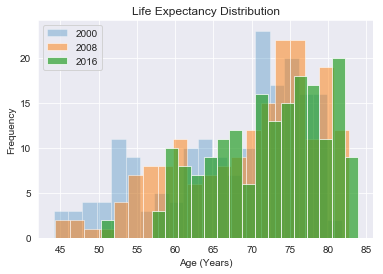

In [61]:
# Removed the Average Life Expectancy plot for 2010, because it would have crowded out the other years

ax1 = df_general['Life Expectancy']['2000'].plot.hist(bins=20, alpha=0.3, label='2000')
ax2 = df_general['Life Expectancy']['2008'].plot.hist(bins=20, alpha=0.5, label='2008')
#ax3 = df_general['Life Expectancy']['2010'].plot.hist(bins=15, alpha=0.6, label='2010')
ax4 = df_general['Life Expectancy']['2016'].plot.hist(bins=20, alpha=0.7, label='2016')

plt.legend()
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Life Expectancy Distribution');

**Observation:** In general, the average life expectancy for most people has shifted upwards since 2000.

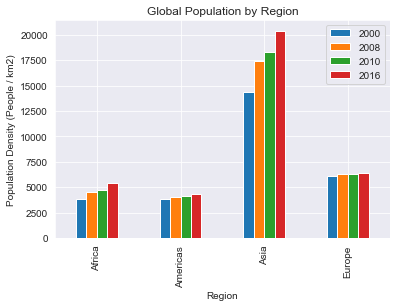

In [62]:
g1 = df_general.groupby('Region').sum()

ax5 = g1['Population'].plot.bar()
plt.xlabel('Region')
plt.ylabel('Population Density (People / km2)')
plt.title('Global Population by Region');

**Observation:** In general, the Asia Region has seen the highest increase in population density from 2000 to 2016. 

In [63]:
df_economic.groupby('Region').sum();

C:\Users\MichaelWei\Anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


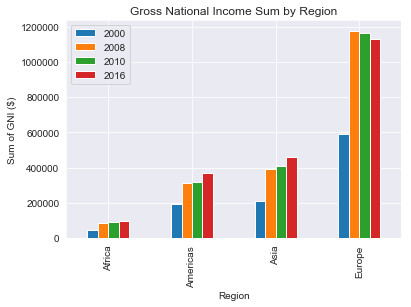

In [64]:
g2 = df_economic.groupby('Region').sum()

ax6 = g2['GNI'].plot.bar()
plt.xlabel('Region')
plt.ylabel('Sum of GNI ($)')
plt.title('Gross National Income Sum by Region');

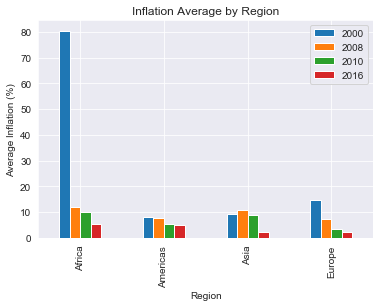

In [65]:
# Average inflation between regions

g3 = df_economic.groupby('Region').mean()

ax7 = g3['Inflation'].plot.bar()

plt.xlabel('Region')
plt.ylabel('Average Inflation (%)')
plt.title('Inflation Average by Region');

**Observation:** Looks like Africa had a huge inflation on average. This likely due to an outlier. Hyperinflation could be a result of political instability for a country. Therefore, we should examine average inflation for countries with under 100 %. Note that an informal definition of hyperinflation is anything over 50 %.

Source: https://www.thebalance.com/what-is-hyperinflation-definition-causes-and-examples-3306097

In [66]:
# Check each region for countries with hyperinflation

# Americas
am_infl = df_economic[df_economic['Region'] == 'Americas']['Inflation']
am_infl[(am_infl['2000'] > 100) | (am_infl['2008'] > 100) | (am_infl['2010'] > 100) | (am_infl['2016'] > 100)]

,2000,2008,2010,2016
country,,,,


In [67]:
# Asia
as_infl = df_economic[df_economic['Region'] == 'Asia']['Inflation']
as_infl[(as_infl['2000'] > 100) | (as_infl['2008'] > 100) | (as_infl['2010'] > 100) | (as_infl['2016'] > 100)]

,2000,2008,2010,2016
country,,,,


In [68]:
# Europe
eu_infl = df_economic[df_economic['Region'] == 'Europe']['Inflation']
drop_eu = eu_infl[(eu_infl['2000'] > 100) | (eu_infl['2008'] > 100) | (eu_infl['2010'] > 100) | (eu_infl['2016'] > 100)].index
drop_eu

Index(['Belarus'], dtype='object', name='country')

In [69]:
# Africa
af_infl = df_economic[df_economic['Region'] == 'Africa']['Inflation']

drop_af = af_infl[(af_infl['2000'] > 100) | (af_infl['2008'] > 100) | (af_infl['2010'] > 100) | (af_infl['2016'] > 100)].index
drop_af

Index(['Angola', 'Congo, Dem. Rep.', 'Nigeria'], dtype='object', name='country')

Show an average Inflation plot based on dropping Belarus, Angola, Democratic Republic of Congo, and Nigeria

In [70]:
df_econ_adj = df_economic.drop(drop_eu)

df_econ_adj = df_econ_adj.drop(drop_af)

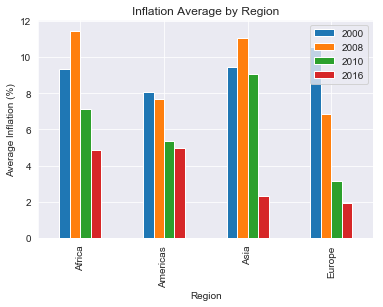

In [71]:
# Average inflation between regions (Dropping Outliers)
g3 = df_econ_adj.groupby('Region').mean()

ax7 = g3['Inflation'].plot.bar()

plt.xlabel('Region')
plt.ylabel('Average Inflation (%)')
plt.title('Inflation Average by Region');

**Observation:** In this case, the data show that most regions saw a general decrease in inflation to approximately 5 % by 2016. This plot looks more representative.

<a id='q2'></a>
### Research Question 2: 
Are there any meaningful correlations between Gross National Income and more subjective indicators (e.g. Energy Production, Energy Usage, Education Levels, Water Availability, Sanitation Availability, and Food Supply)? How do these indicators compare between regions of the world as defined by Gapminder (Asia, Americas, Europe, Africa)?

### Economic Indicators
* Inflation
* GNI

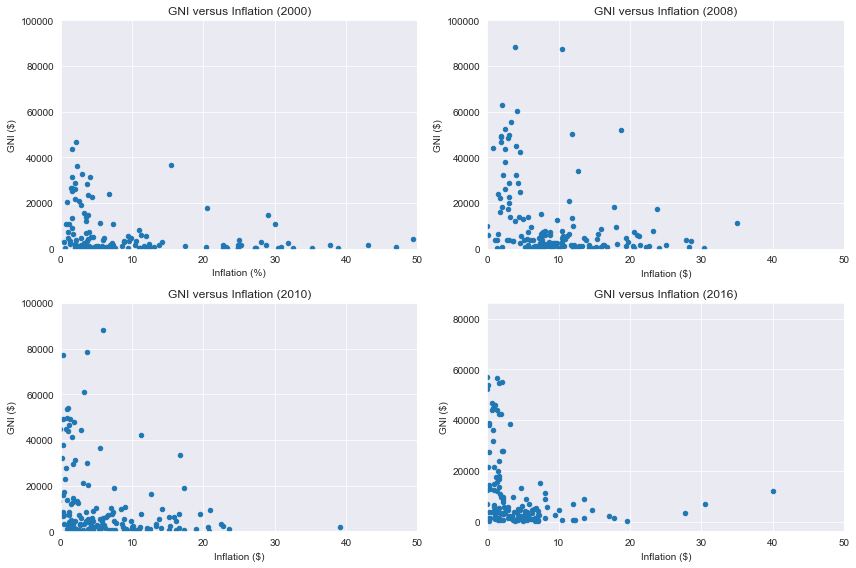

In [72]:
fig = plt.figure(figsize=(12, 8))
ax8 = plt.subplot(2, 2, 1)
df_economic.plot.scatter(('Inflation', '2000'), ('GNI', '2000'), ax=ax8)
plt.xlim((0, 50))
plt.ylim((0, 100000))
plt.xlabel('Inflation (%)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2000)')

ax9 = plt.subplot(2, 2, 2)
df_economic.plot.scatter(('Inflation', '2008'), ('GNI', '2008'), ax=ax9)
plt.xlim((0, 50))
plt.ylim((0, 100000))
plt.xlabel('Inflation ($)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2008)')

ax10 = plt.subplot(2, 2, 3)
df_economic.plot.scatter(('Inflation', '2010'), ('GNI', '2010'), ax=ax10)
plt.xlim((0, 50))
plt.ylim((0, 100000))
plt.xlabel('Inflation ($)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2010)')

ax11 = plt.subplot(2, 2, 4)
df_economic.plot.scatter(('Inflation', '2016'), ('GNI', '2016'), ax=ax11)
plt.xlim((0, 50))
plt.xlabel('Inflation ($)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2016)')

plt.tight_layout();

**Observation:** Looks like the GNI is generally clustered around low inflation. From 2000 through 2016, inflation has shifted to lower rates.

### Energy Indicators

**Note:**
1. Only 2 years of data are available for this set
2. Used Electricity Usage per person as a possible indicator of the wealth of nations

In [73]:
df_nrg.head()

NRG Produced          NRG Used           Region
                  2000     2008     2000   2008          
country                                                  
Albania        0.00032  0.00036    709.0  636.0    Europe
Algeria        0.00466  0.00471    373.0  591.0    Africa
Angola         0.00314  0.00586     76.1  173.0    Africa
Argentina      0.00223  0.00209    570.0  768.0  Americas
Armenia        0.00021  0.00026    512.0  604.0    Europe

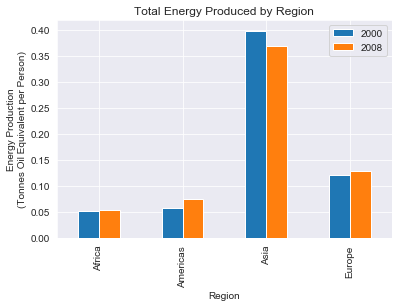

In [74]:
g3 = df_nrg.groupby('Region').sum()

ax12 = g3['NRG Produced'].plot.bar()

plt.title('Total Energy Produced by Region')
plt.xlabel('Region')
plt.ylabel('Energy Production\n(Tonnes Oil Equivalent per Person)');

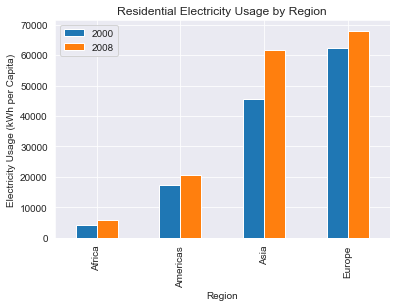

In [75]:
ax13 = g3['NRG Used'].plot.bar()

plt.title('Residential Electricity Usage by Region')
plt.xlabel('Region')
plt.ylabel('Electricity Usage (kWh per Capita)');

In [76]:
# Correlate Energy Usage and Production to GNI

df_nrg_GNI = df_nrg.merge(df_economic, how='inner')

df_nrg_GNI.head()

NRG Produced          NRG Used         Region Inflation                 \
          2000     2008     2000   2008              2000   2008    2010   
0      0.00032  0.00036    709.0  636.0  Europe      3.98   7.63   4.490   
1      0.00032  0.00036    709.0  636.0  Europe     -1.37   5.99   7.770   
2      0.00032  0.00036    709.0  636.0  Europe      1.36   1.96   0.873   
3      0.00032  0.00036    709.0  636.0  Europe     12.50  27.80  13.800   
4      0.00032  0.00036    709.0  636.0  Europe    185.00  21.20  15.100   

               GNI                            Unemployment                \
     2016     2000     2008     2010     2016         2000   2008   2010   
0  -0.481   1170.0   3950.0   4360.0   4320.0          NaN  11.50  11.70   
1   0.269    660.0   3600.0   3470.0   3770.0          NaN    NaN  17.30   
2   1.090  26800.0  49100.0  49600.0  45900.0         4.27   3.61   4.38   
3  14.700    610.0   3900.0   5410.0   4760.0          NaN   4.34   4.33   
4   8.340   1380.0   5470.0   6080.0   5620.0          NaN    NaN    NaN   

          
    2016  
0    NaN  
1  16.80  
2   5.42  
3   4.16  
4   5.39

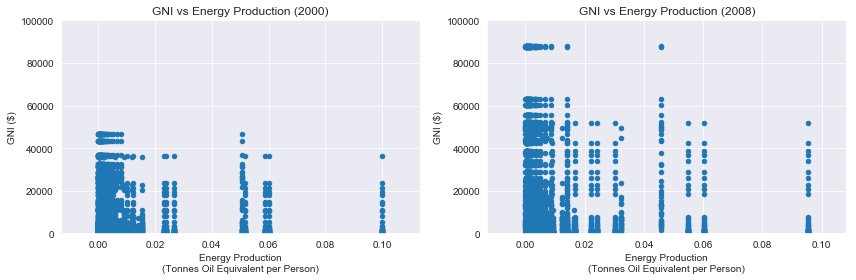

In [77]:
fig = plt.figure(figsize=(12, 4))

ax14 = plt.subplot(1, 2, 1)
df_nrg_GNI.plot.scatter(('NRG Produced', '2000'), ('GNI', '2000'), ax=ax14)
plt.ylim((0, 100000))
plt.xlabel('Energy Production\n(Tonnes Oil Equivalent per Person)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Production (2000)')

ax15 = plt.subplot(1, 2, 2)
df_nrg_GNI.plot.scatter(('NRG Produced', '2008'), ('GNI', '2008'), ax=ax15)
plt.ylim((0, 100000))
plt.xlabel('Energy Production\n(Tonnes Oil Equivalent per Person)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Production (2008)')

plt.tight_layout();

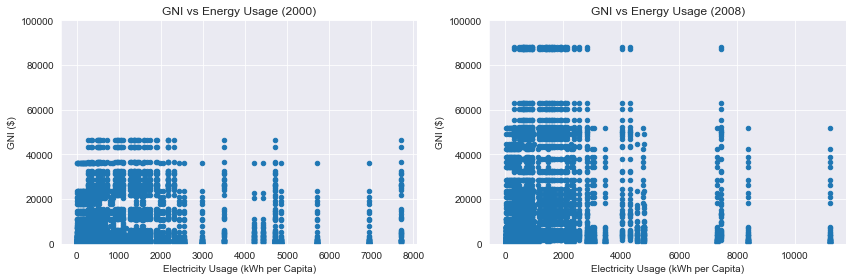

In [78]:
fig = plt.figure(figsize=(12, 4))

ax16 = plt.subplot(1, 2, 1)
df_nrg_GNI.plot.scatter(('NRG Used', '2000'), ('GNI', '2000'), ax=ax16)
plt.ylim((0, 100000));
plt.xlabel('Electricity Usage (kWh per Capita)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Usage (2000)')

ax17 = plt.subplot(1, 2, 2)
df_nrg_GNI.plot.scatter(('NRG Used', '2008'), ('GNI', '2008'), ax=ax17)
plt.ylim((0, 100000));
plt.xlabel('Electricity Usage (kWh per Capita)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Usage (2008)')

plt.tight_layout();

**Observation:** No meaningful relationship between Energy Produced and GNI. The same holds true for the Residential Electricity Usage versus GNI. 

### Education Indicators
* Mean Years in School (Males)
* Mean Years in School (Females)

In [79]:
df_edu.head()

Mean Years School (M)       Mean Years School (F)        \
                                     2000  2008                  2000  2008   
country                                                                       
Afghanistan                           2.1   2.6                   0.2   0.3   
Albania                               9.1  10.1                   8.0   9.2   
Algeria                               3.7   4.6                   3.0   4.0   
Angola                                4.0   5.0                   1.9   2.7   
Antigua and Barbuda                  11.0  11.7                  11.2  12.1   

                       Region  
                               
country                        
Afghanistan              Asia  
Albania                Europe  
Algeria                Africa  
Angola                 Africa  
Antigua and Barbuda  Americas

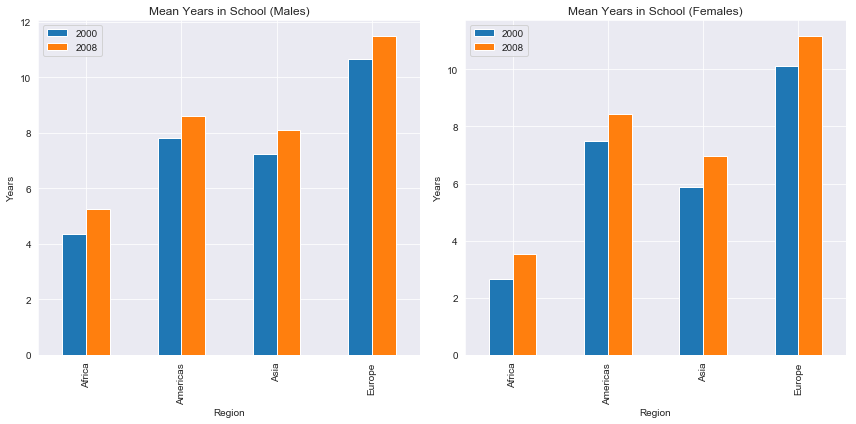

In [80]:
g4 = df_edu.groupby('Region').mean()

fig =  plt.figure(figsize=(12, 6))

ax18 = plt.subplot(1, 2, 1)
g4['Mean Years School (M)'].plot.bar(ax=ax18)
plt.title('Mean Years in School (Males)')
plt.ylabel('Years');

ax19 = plt.subplot(1, 2, 2)
g4['Mean Years School (F)'].plot.bar(ax=ax19)
plt.title('Mean Years in School (Females)')
plt.ylabel('Years')

plt.tight_layout();

**Observation:** All regions showed an average increase in schooling for both males and females between 2000 and 2008. 

In [81]:
df_school_econ = df_edu.merge(df_economic, how='inner')

df_school_econ.head()

Mean Years School (M)      Mean Years School (F)      Region Inflation  \
                   2000 2008                  2000 2008             2000   
0                   2.1  2.6                   0.2  0.3   Asia      2.58   
1                   2.1  2.6                   0.2  0.3   Asia     30.00   
2                   2.1  2.6                   0.2  0.3   Asia      3.45   
3                   2.1  2.6                   0.2  0.3   Asia      2.29   
4                   2.1  2.6                   0.2  0.3   Asia     29.00   

                             GNI                            Unemployment  \
    2008   2010    2016     2000     2008     2010     2016         2000   
0   4.53   1.16 -0.4580  21100.0  42300.0  46600.0  54100.0         5.04   
1  11.40   7.44  0.0805  10900.0  20900.0  19000.0  21400.0          NaN   
2   7.86   7.14  6.7300    420.0    640.0    780.0   1330.0         1.02   
3   5.65   5.99  4.2400    770.0   1730.0   1970.0   2510.0          NaN   
4  12.70  16.70 -9.1800  14700.0  34200.0  33300.0  32900.0          NaN   

                     
   2008  2010  2016  
0  3.36  4.04  4.50  
1   NaN  0.69   NaN  
2   NaN  2.46  3.21  
3   NaN  2.11   NaN  
4   NaN   NaN   NaN

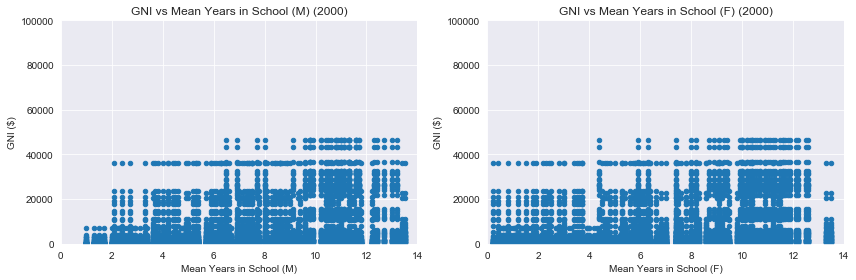

In [82]:
fig = plt.figure(figsize=(12, 4))

ax18 = plt.subplot(1, 2, 1)
df_school_econ.plot.scatter(('Mean Years School (M)', '2000'), ('GNI', '2000'), ax=ax18)
plt.xlim((0, 14))
plt.ylim((0, 100000))
plt.xlabel('Mean Years in School (M)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (M) (2000)')

ax19 = plt.subplot(1, 2, 2)
df_school_econ.plot.scatter(('Mean Years School (F)', '2000'), ('GNI', '2000'), ax=ax19)
plt.xlim((0, 14))
plt.ylim((0, 100000))
plt.xlabel('Mean Years in School (F)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (F) (2000)')

plt.tight_layout();

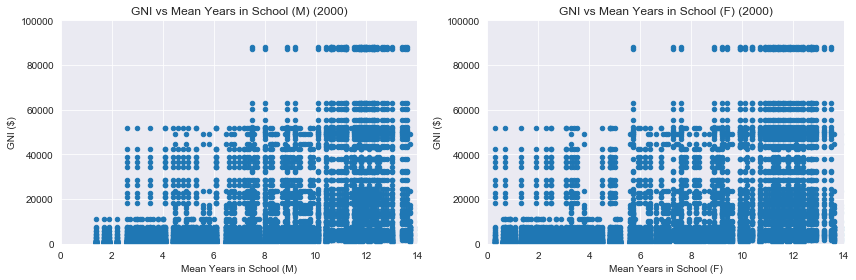

In [83]:
fig = plt.figure(figsize=(12, 4))

ax20 = plt.subplot(1, 2, 1)
df_school_econ.plot.scatter(('Mean Years School (M)', '2008'), ('GNI', '2008'), ax=ax20)
plt.xlim((0, 14))
plt.ylim((0, 100000))
plt.xlabel('Mean Years in School (M)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (M) (2000)')


ax21 = plt.subplot(1, 2, 2)
df_school_econ.plot.scatter(('Mean Years School (F)', '2008'), ('GNI', '2008'), ax=ax21)
plt.xlim((0, 14))
plt.ylim((0, 100000))
plt.xlabel('Mean Years in School (F)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (F) (2000)')

plt.tight_layout();

**Observation:** It looks like for Mean Years in School for Males, the data may have shifted to the right slightly. However, there is no direct meaningful correlation between Mean Years in School (Male or Female) and GNI. However, between 2000 and 2008, higher GNIs have coincided with more data clustered around higher Mean Years in School for both Males and Females. A high number of either males or females in school does not necessarily correlate with higher GNI for a nation. 

### Health Indicators
* Water Availability (%)
* Sanitation Availability (%)
* Food Supply (Calories/(person-day))

Note: 1 Food Calorie = 1 kcalorie

In [84]:
g5 = df_health.groupby('Region').mean()

g5.head();

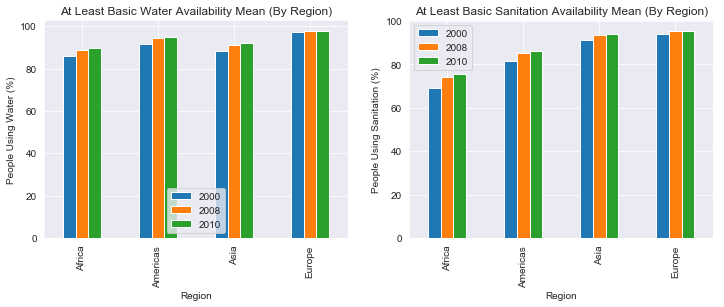

In [85]:
fig = plt.figure(figsize=(12, 4))

ax20 = plt.subplot(1, 2, 1)
g5['Water Available'].plot.bar(ax=ax20)
plt.title('At Least Basic Water Availability Mean (By Region)')
plt.ylabel('People Using Water (%)')

ax21 = plt.subplot(1, 2, 2)
g5['Sanitation Available'].plot.bar(ax=ax21)
plt.title('At Least Basic Sanitation Availability Mean (By Region)')
plt.ylabel('People Using Sanitation (%)');

**Observation:** Looks like access to water has steadily increased from 2000 to 2010 for each region, except for Europe, which has remained at approximately 95 %.

Looks like access to basic sanitation has steadily increased from 2000 to 2010 for each region, except for Europe (Slight increase)

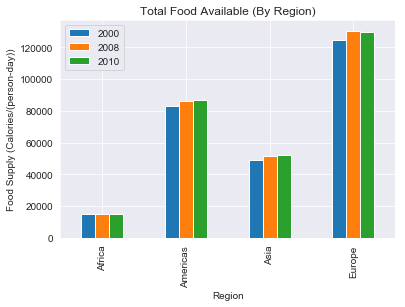

In [86]:
# Note: Used the Sum for Food Supply, because an Average or Median might misrepresent what is available
# overall. 

ax22 = df_health.groupby('Region').sum()['Food Supply'].plot.bar()
plt.title('Total Food Available (By Region)')
plt.ylabel('Food Supply (Calories/(person-day))');

**Observation:** The food supplies are generally disproportionate between each region. The Americas is not #1 in Food Supply (Despite all of the hamburgers and pizzas in circulation). 

In [87]:
df_health_econ = df_health.merge(df_economic, how='inner')

df_health_econ.head()

Water Available             Sanitation Available             Food Supply  \
             2000  2008  2010                 2000  2008  2010        2000   
0            87.6  88.0  88.1                 88.3  94.3  95.6      2730.0   
1            87.6  88.0  88.1                 88.3  94.3  95.6      2730.0   
2            87.6  88.0  88.1                 88.3  94.3  95.6      2730.0   
3            87.6  88.0  88.1                 88.3  94.3  95.6      2730.0   
4            87.6  88.0  88.1                 88.3  94.3  95.6      2730.0   

              Murders per capita  ...   Inflation              GNI           \
   2008  2010               2000  ...        2010    2016     2000     2008   
0  2950  3080               3.96  ...       4.490  -0.481   1170.0   3950.0   
1  2950  3080               3.96  ...       7.770   0.269    660.0   3600.0   
2  2950  3080               3.96  ...       0.873   1.090  26800.0  49100.0   
3  2950  3080               3.96  ...      13.800  14.700    610.0   3900.0   
4  2950  3080               3.96  ...      15.100   8.340   1380.0   5470.0   

                    Unemployment                       
      2010     2016         2000   2008   2010   2016  
0   4360.0   4320.0          NaN  11.50  11.70    NaN  
1   3470.0   3770.0          NaN    NaN  17.30  16.80  
2  49600.0  45900.0         4.27   3.61   4.38   5.42  
3   5410.0   4760.0          NaN   4.34   4.33   4.16  
4   6080.0   5620.0          NaN    NaN    NaN   5.39  

[5 rows x 28 columns]

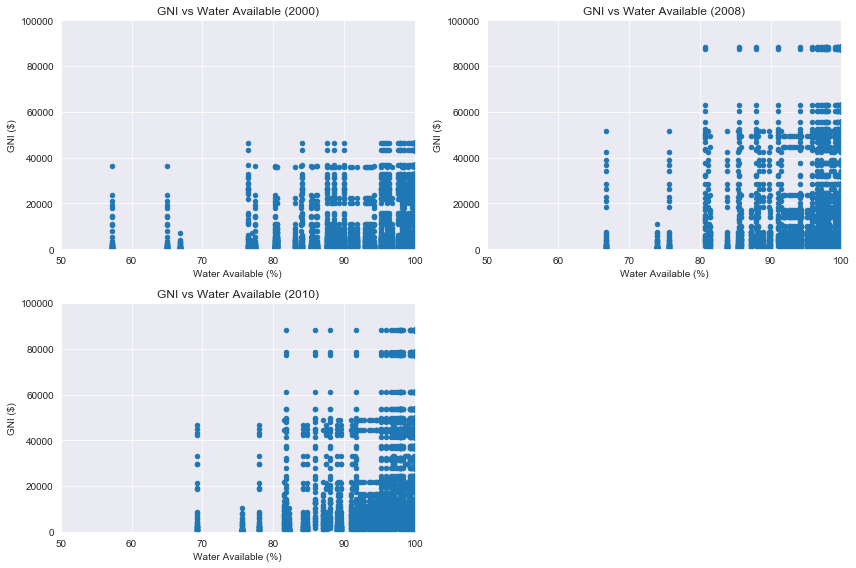

In [88]:
fig = plt.figure(figsize=(12, 8))

ax23 = plt.subplot(2, 2, 1)
df_health_econ.plot.scatter(('Water Available', '2000'), ('GNI', '2000'), ax=ax23)
plt.xlim((50, 100))
plt.ylim((0, 100000))
plt.xlabel('Water Available (%)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Water Available (2000)')

ax24 = plt.subplot(2, 2, 2)
df_health_econ.plot.scatter(('Water Available', '2008'), ('GNI', '2008'), ax=ax24)
plt.xlim((50, 100))
plt.ylim((0, 100000))
plt.xlabel('Water Available (%)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Water Available (2008)')

ax25 = plt.subplot(2, 2, 3)
df_health_econ.plot.scatter(('Water Available', '2010'), ('GNI', '2010'), ax=ax25)
plt.xlim((50, 100))
plt.ylim((0, 100000))
plt.xlabel('Water Available (%)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Water Available (2010)')

plt.tight_layout();

**Observation:** Although not directly correlated, the data has generally shifted to the right from 2000 to 2010 as basic access to water has increased

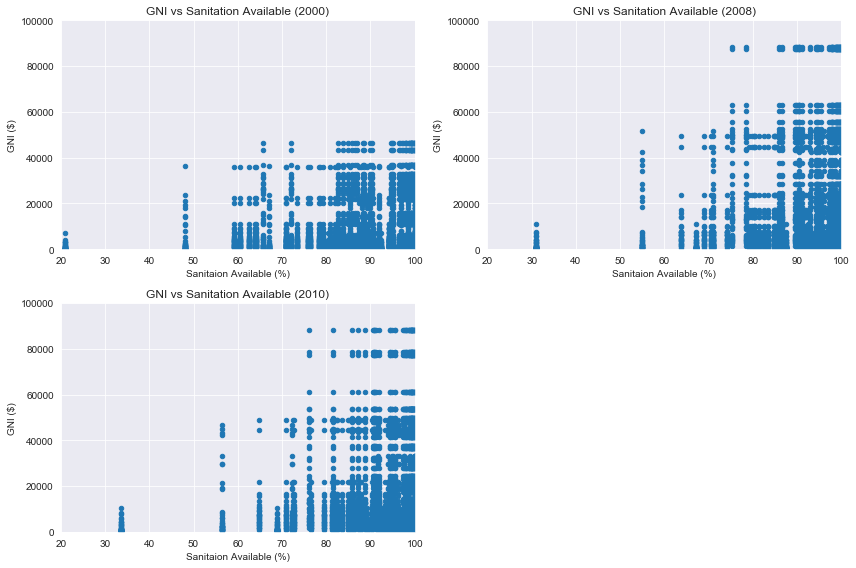

In [89]:
fig = plt.figure(figsize=(12, 8))

ax26 = plt.subplot(2, 2, 1)
df_health_econ.plot.scatter(('Sanitation Available', '2000'), ('GNI', '2000'), ax=ax26)
plt.xlim((20, 100))
plt.ylim((0, 100000))
plt.xlabel('Sanitaion Available (%)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Sanitation Available (2000)')

ax27 = plt.subplot(2, 2, 2)
df_health_econ.plot.scatter(('Sanitation Available', '2008'), ('GNI', '2008'), ax=ax27)
plt.xlim((20, 100))
plt.ylim((0, 100000))
plt.xlabel('Sanitaion Available (%)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Sanitation Available (2008)')

ax28 = plt.subplot(2, 2, 3)
df_health_econ.plot.scatter(('Sanitation Available', '2010'), ('GNI', '2010'), ax=ax28)
plt.xlim((20, 100))
plt.ylim((0, 100000))
plt.xlabel('Sanitaion Available (%)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Sanitation Available (2010)')

plt.tight_layout();

**Observation:** Although not a strong correlation, the data has shifted to the right, indicating that higher GNIs are correlated with Basic Sanitation Availability. It is possible that people must wash their hands more often when GNI goes up.

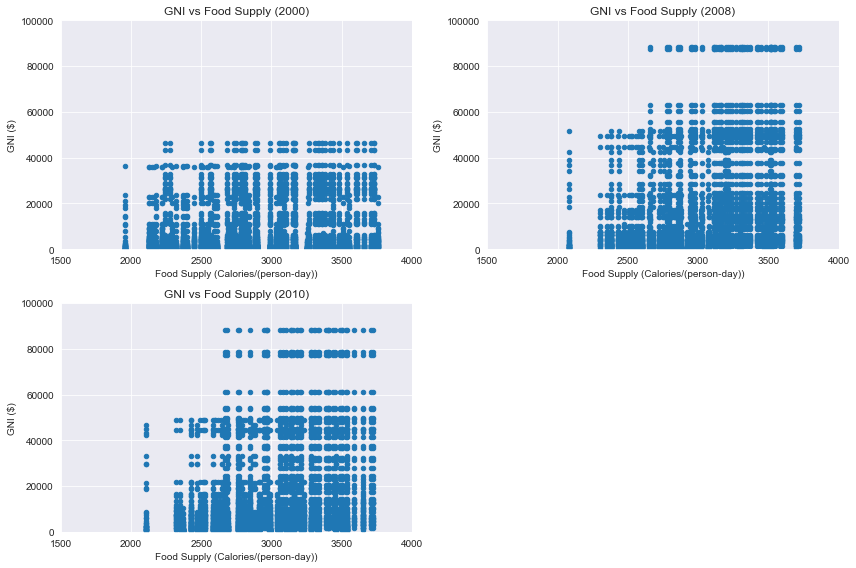

In [90]:
fig = plt.figure(figsize=(12, 8))

ax29 = plt.subplot(2, 2, 1)
df_health_econ.plot.scatter(('Food Supply', '2000'), ('GNI', '2000'), ax=ax29)
plt.xlim((1500, 4000))
plt.ylim((0, 100000))
plt.xlabel('Food Supply (Calories/(person-day))')
plt.ylabel('GNI ($)')
plt.title('GNI vs Food Supply (2000)')

ax30 = plt.subplot(2, 2, 2)
df_health_econ.plot.scatter(('Food Supply', '2008'), ('GNI', '2008'), ax=ax30)
plt.xlim((1500, 4000))
plt.ylim((0, 100000))
plt.xlabel('Food Supply (Calories/(person-day))')
plt.ylabel('GNI ($)')
plt.title('GNI vs Food Supply (2008)')

ax31 = plt.subplot(2, 2, 3)
df_health_econ.plot.scatter(('Food Supply', '2010'), ('GNI', '2010'), ax=ax31)
plt.xlim((1500, 4000))
plt.ylim((0, 100000))
plt.xlabel('Food Supply (Calories/(person-day))')
plt.ylabel('GNI ($)')
plt.title('GNI vs Food Supply (2010)')

plt.tight_layout();

**Observation:** There is no meaningful correlation between Food Supply and GNI. There are countries with very high Food Supply and low GNI.

<a id='q3'></a>
### Research Question 3 

Are there characteristic differentiators between countries with the Top 15 % Percentile of GNI versus the Bottom 15 % for GNI?

Note: Used 2010 as the basis. This type of analysis can be applied to other years

In [91]:
df_economic.head()

Inflation                           GNI                    \
                         2000   2008   2010    2016    2000     2008     2010   
country                                                                         
Albania                  3.98   7.63   4.49  -0.481  1170.0   3950.0   4360.0   
Algeria                 22.70  15.40  16.10   0.890  1590.0   4200.0   4460.0   
Angola                 418.00  19.70  22.40  27.700   360.0   2760.0   3240.0   
Antigua and Barbuda      1.55   4.38   1.44   1.560  9230.0  14100.0  11800.0   
Argentina                1.04  23.20  20.90  40.100  7440.0   7610.0   9170.0   

                             Unemployment                       Region  
                        2016         2000   2008   2010 2016            
country                                                                 
Albania               4320.0          NaN  11.50  11.70  NaN    Europe  
Algeria               4360.0          NaN   8.57   7.66  NaN    Africa  
Angola                3450.0          NaN    NaN    NaN  NaN    Africa  
Antigua and Barbuda  13600.0          NaN    NaN    NaN  NaN  Americas  
Argentina            11900.0          NaN   5.92   5.34  NaN  Americas

In [92]:
top_thres = df_economic['GNI']['2010'].quantile(0.85)
print('Top 15 percentile of GNI Threshold: {:.2f}'.format(top_thres))

Top 15 percentile of GNI Threshold: 30700.00


In [93]:
df_top15 = df_economic[df_economic['GNI']['2010'] >= top_thres]

In [94]:
# Make a column that is the country so that when we join dataframes, 1 of the countries indices will show up
df_top15['country'] = df_top15.index.copy();

C:\Users\MichaelWei\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
# Show the Top 15 % of GNI earning countries
df_top15

Inflation                              GNI                    \
                    2000    2008    2010    2016     2000     2008     2010   
country                                                                       
Australia           2.58   4.530   1.160 -0.4580  21100.0  42300.0  46600.0   
Austria             1.36   1.960   0.873  1.0900  26800.0  49100.0  49600.0   
Belgium             2.02   1.920   1.880  1.5800  26000.0  46700.0  47900.0   
Brunei             29.00  12.700  16.700 -9.1800  14700.0  34200.0  33300.0   
Canada              4.34   4.000   2.870  0.6120  22600.0  44800.0  44400.0   
Cyprus              3.86   4.020   2.010 -0.6840  14900.0  32100.0  31300.0   
Denmark             3.02   4.130   3.220 -0.0464  32700.0  60400.0  61200.0   
Finland             1.63   3.080   0.351  0.7910  26400.0  49900.0  49300.0   
France              1.60   2.430   1.050  0.1810  25100.0  43500.0  43800.0   
Germany            -0.45   0.839   0.758  1.3300  26200.0  43900.0  44800.0   
Iceland             4.02  11.900   5.470  2.1100  31500.0  50100.0  36500.0   
Ireland             6.79  -0.889  -3.220  0.0207  24100.0  51100.0  44800.0   
Italy               1.97   2.480   0.319  0.8480  21800.0  37800.0  37700.0   
Japan              -1.38  -0.981  -1.900  0.2740  36200.0  38900.0  43400.0   
Kuwait             20.50  18.700  11.200 -6.1300  17900.0  51800.0  42100.0   
Luxembourg          2.16   3.880   3.620 -1.3100  46600.0  88200.0  78400.0   
Netherlands         3.62   2.480   0.848  0.5840  28500.0  52500.0  53500.0   
Norway             15.40  10.400   5.950 -1.1100  36600.0  87400.0  88400.0   
Singapore           3.74  -1.490  -0.046 -0.0365  23700.0  36700.0  44800.0   
Spain               3.28   2.140   0.160  0.2830  15800.0  32500.0  32100.0   
Sweden              1.56   3.320   0.991  1.5900  31200.0  55400.0  53900.0   
Switzerland         1.50   2.030   0.317 -0.5660  43500.0  62900.0  77400.0   
United Kingdom      2.05   2.820   1.570  1.9700  28900.0  48400.0  41400.0   
United States       2.28   1.960   1.220  1.2800  36100.0  49300.0  49000.0   

                        Unemployment                         Region  \
                   2016         2000   2008   2010   2016             
country                                                               
Australia       54100.0         5.04   3.36   4.04   4.50      Asia   
Austria         45900.0         4.27   3.61   4.38   5.42    Europe   
Belgium         42600.0         5.83   6.10   7.31   7.11    Europe   
Brunei          32900.0          NaN    NaN    NaN    NaN      Asia   
Canada          43900.0         5.75   5.09   6.92   5.96  Americas   
Cyprus          24400.0         4.53   3.16   5.38  11.70    Europe   
Denmark         57000.0         4.07   2.63   6.59   5.54    Europe   
Finland         45000.0         7.94   4.87   6.80   7.41    Europe   
France          38800.0         9.27   6.03   7.58   8.92    Europe   
Germany         44000.0         7.12   7.00   6.54   3.90    Europe   
Iceland         55000.0         1.34   1.93   6.34   2.48    Europe   
Ireland         53900.0         4.05   5.66  13.10   7.52    Europe   
Italy           31700.0         8.79   5.96   7.51  11.10    Europe   
Japan           38000.0         4.05   3.86   4.89   3.14      Asia   
Kuwait          34900.0          NaN    NaN    NaN    NaN      Asia   
Luxembourg      71600.0         2.01   4.17   3.91   5.33    Europe   
Netherlands     46600.0         2.28   2.02   3.62   4.62    Europe   
Norway          82000.0         2.39   1.92   2.96   4.29    Europe   
Singapore       52400.0         5.70   3.41   3.58   3.60      Asia   
Spain           27600.0        12.30  10.10  18.40  18.20    Europe   
Sweden          54500.0         4.95   4.31   6.46   5.49    Europe   
Switzerland     82100.0         2.25   2.87   4.54   4.72    Europe   
United Kingdom  42400.0         4.48   4.16   6.08   3.64    Europe   
United States   56800.0         3.0

In [96]:
# Drop Region columns, because we don't need to show them anymore

df_nrg.drop('Region', axis=1, inplace=True)
df_edu.drop('Region', axis=1, inplace=True)
df_health.drop('Region', axis=1, inplace=True)

In [97]:
df_top15 = df_top15.merge(df_nrg, how='inner', left_index=True, right_index=True)

In [98]:
df_top15 = df_top15.merge(df_edu, how='inner', left_index=True, right_index=True)

In [99]:
df_top15 = df_top15.merge(df_health, how='inner', left_index=True, right_index=True)

In [100]:
# Check that the merges worked

df_top15

Inflation                              GNI                    \
                    2000    2008    2010    2016     2000     2008     2010   
country                                                                       
Australia           2.58   4.530   1.160 -0.4580  21100.0  42300.0  46600.0   
Austria             1.36   1.960   0.873  1.0900  26800.0  49100.0  49600.0   
Belgium             2.02   1.920   1.880  1.5800  26000.0  46700.0  47900.0   
Canada              4.34   4.000   2.870  0.6120  22600.0  44800.0  44400.0   
Cyprus              3.86   4.020   2.010 -0.6840  14900.0  32100.0  31300.0   
Denmark             3.02   4.130   3.220 -0.0464  32700.0  60400.0  61200.0   
Finland             1.63   3.080   0.351  0.7910  26400.0  49900.0  49300.0   
France              1.60   2.430   1.050  0.1810  25100.0  43500.0  43800.0   
Germany            -0.45   0.839   0.758  1.3300  26200.0  43900.0  44800.0   
Ireland             6.79  -0.889  -3.220  0.0207  24100.0  51100.0  44800.0   
Japan              -1.38  -0.981  -1.900  0.2740  36200.0  38900.0  43400.0   
Kuwait             20.50  18.700  11.200 -6.1300  17900.0  51800.0  42100.0   
Luxembourg          2.16   3.880   3.620 -1.3100  46600.0  88200.0  78400.0   
Netherlands         3.62   2.480   0.848  0.5840  28500.0  52500.0  53500.0   
Norway             15.40  10.400   5.950 -1.1100  36600.0  87400.0  88400.0   
Spain               3.28   2.140   0.160  0.2830  15800.0  32500.0  32100.0   
Sweden              1.56   3.320   0.991  1.5900  31200.0  55400.0  53900.0   
Switzerland         1.50   2.030   0.317 -0.5660  43500.0  62900.0  77400.0   
United Kingdom      2.05   2.820   1.570  1.9700  28900.0  48400.0  41400.0   
United States       2.28   1.960   1.220  1.2800  36100.0  49300.0  49000.0   

                        Unemployment          ...   Sanitation Available  \
                   2016         2000   2008   ...                   2010   
country                                       ...                          
Australia       54100.0         5.04   3.36   ...                  100.0   
Austria         45900.0         4.27   3.61   ...                  100.0   
Belgium         42600.0         5.83   6.10   ...                   99.5   
Canada          43900.0         5.75   5.09   ...                   98.5   
Cyprus          24400.0         4.53   3.16   ...                   99.6   
Denmark         57000.0         4.07   2.63   ...                   99.6   
Finland         45000.0         7.94   4.87   ...                   99.4   
France          38800.0         9.27   6.03   ...                   98.7   
Germany         44000.0         7.12   7.00   ...                   99.2   
Ireland         53900.0         4.05   5.66   ...                   91.0   
Japan           38000.0         4.05   3.86   ...                  100.0   
Kuwait          34900.0          NaN    NaN   ...                  100.0   
Luxembourg      71600.0         2.01   4.17   ...                   97.6   
Netherlands     46600.0         2.28   2.02   ...                   97.8   
Norway          82000.0         2.39   1.92   ...                   98.1   
Spain           27600.0        12.30  10.10   ...                   99.9   
Sweden          54500.0         4.95   4.31   ...                   99.3   
Switzerland     82100.0         2.25   2.87   ...                   99.9   
United Kingdom  42400.0         4.48   4.16   ...                   99.1   
United States   56800.0         3.06   4.82   ...                  100.0   

               Food Supply             Murders per capita                \
                      2000  2008  2010               2000   2008   2010   
country                                                                   
Australia           2990.0  3200  3210              1.590  1.090  1.010   
Austria             3730.0  3720  3720              0.875  0.492  0.428   
Belgium             3710.0  3700  3710              1.710  1.100  0.981  

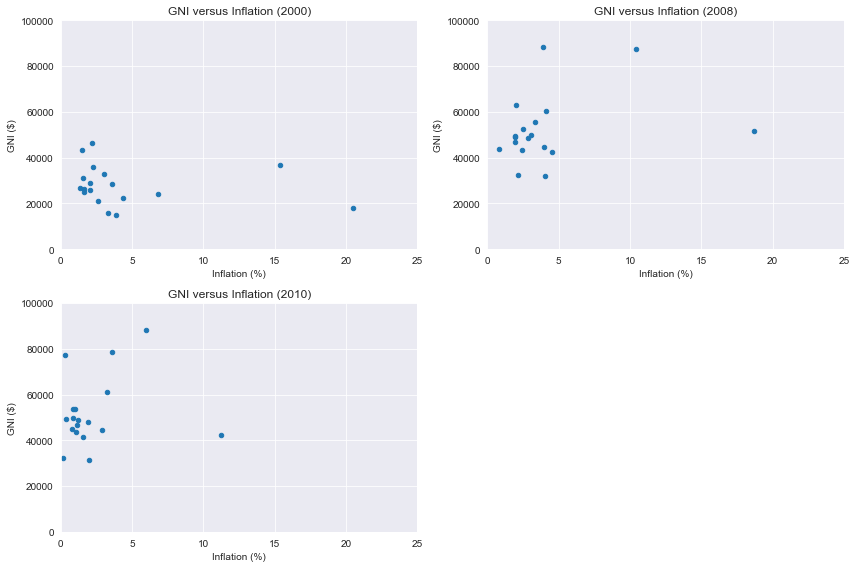

In [101]:
fig=plt.figure(figsize=(12, 8))
ax32 = plt.subplot(2, 2, 1)
df_top15.plot.scatter(('Inflation', '2000'), ('GNI', '2000'), ax=ax32)
plt.xlim((0, 25))
plt.ylim((0, 100000))
plt.xlabel('Inflation (%)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2000)')

ax33 = plt.subplot(2, 2, 2)
df_top15.plot.scatter(('Inflation', '2008'), ('GNI', '2008'), ax=ax33)
plt.xlim((0, 25))
plt.ylim((0, 100000))
plt.xlabel('Inflation (%)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2008)')

ax34 = plt.subplot(2, 2, 3)
df_top15.plot.scatter(('Inflation', '2010'), ('GNI', '2010'), ax=ax34)
plt.xlim((0, 25))
plt.ylim((0, 100000))
plt.xlabel('Inflation (%)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2010)')

plt.tight_layout();

**Observation:** From 2000 to 2010, most of the Top 15 % countries show a decrease in inflation to below 2.5 %. Additionally, GNI appears to have clustered around $50,000. 

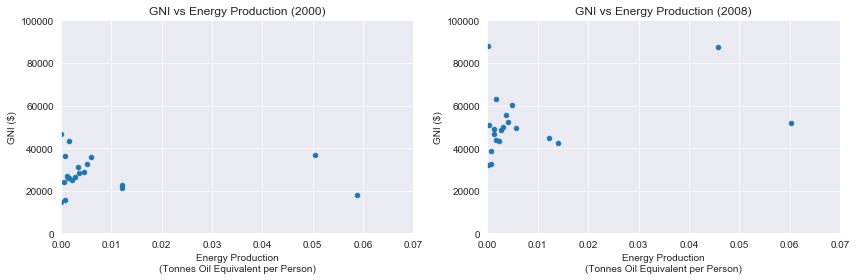

In [102]:
fig = plt.figure(figsize=(12, 4))

ax35 = plt.subplot(1, 2, 1)
df_top15.plot.scatter(('NRG Produced', '2000'), ('GNI', '2000'), ax=ax35)
plt.xlim((0, 0.07))
plt.ylim((0, 100000))
plt.xlabel('Energy Production\n(Tonnes Oil Equivalent per Person)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Production (2000)')

ax36 = plt.subplot(1, 2, 2)
df_top15.plot.scatter(('NRG Produced', '2008'), ('GNI', '2008'), ax=ax36)
plt.xlim((0, 0.07))
plt.ylim((0, 100000))
plt.xlabel('Energy Production\n(Tonnes Oil Equivalent per Person)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Production (2008)')

plt.tight_layout();

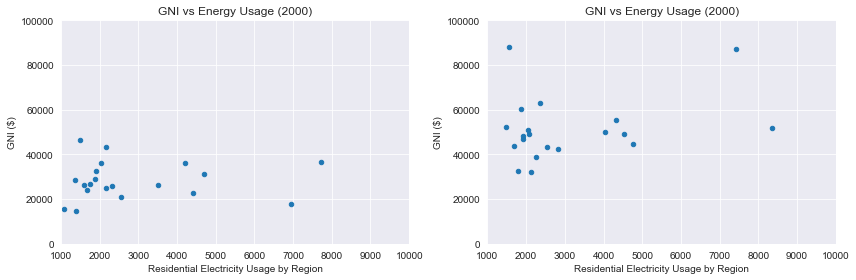

In [103]:
fig = plt.figure(figsize=(12, 4))

ax37 = plt.subplot(1, 2, 1)
df_top15.plot.scatter(('NRG Used', '2000'), ('GNI', '2000'), ax=ax37)
plt.xlim((1000, 10000))
plt.ylim((0, 100000))
plt.xlabel('Residential Electricity Usage by Region')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Usage (2000)')

ax38 = plt.subplot(1, 2, 2)
df_top15.plot.scatter(('NRG Used', '2008'), ('GNI', '2008'), ax=ax38)
plt.xlim((1000, 10000))
plt.ylim((0, 100000))
plt.xlabel('Residential Electricity Usage by Region')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Usage (2000)')

plt.tight_layout();

**Observation:** While most Top 15 % countries didn't show a substantial increase in Energy Produced per person or Electricity Usage per Person, both sets of data coincided with an increase in GNI overall.

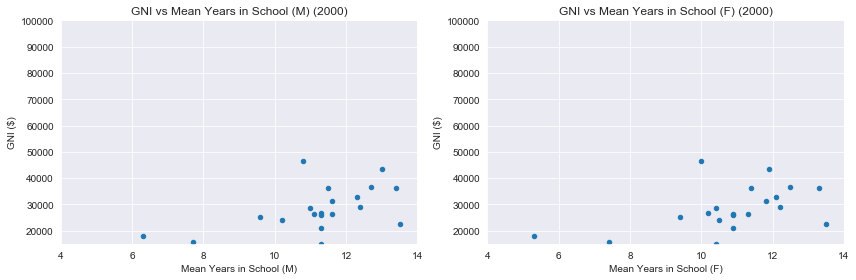

In [104]:
fig = plt.figure(figsize=(12, 4))

ax39 = plt.subplot(1, 2, 1)
df_top15.plot.scatter(('Mean Years School (M)', '2000'), ('GNI', '2000'), ax=ax39)
plt.xlim((4, 14))
plt.ylim((15000, 100000))
plt.xlabel('Mean Years in School (M)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (M) (2000)')

ax40 = plt.subplot(1, 2, 2)
df_top15.plot.scatter(('Mean Years School (F)', '2000'), ('GNI', '2000'), ax=ax40)
plt.xlim((4, 14))
plt.ylim((15000, 100000))
plt.xlabel('Mean Years in School (F)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (F) (2000)')

plt.tight_layout()

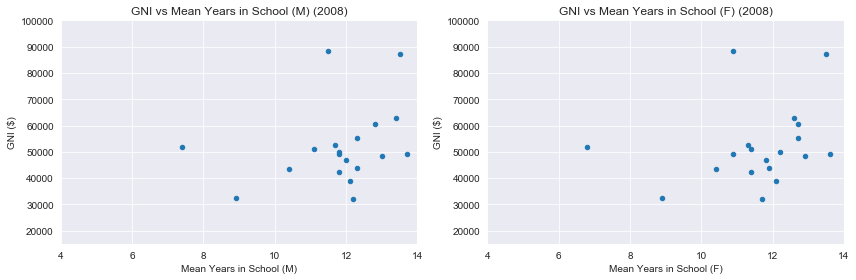

In [105]:
fig = plt.figure(figsize=(12, 4))

ax41 = plt.subplot(1, 2, 1)
df_top15.plot.scatter(('Mean Years School (M)', '2008'), ('GNI', '2008'), ax=ax41)
plt.xlim((4, 14))
plt.ylim((15000, 100000))
plt.xlabel('Mean Years in School (M)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (M) (2008)')

ax42 = plt.subplot(1, 2, 2)
df_top15.plot.scatter(('Mean Years School (F)', '2008'), ('GNI', '2008'), ax=ax42)
plt.xlim((4, 14))
plt.ylim((15000, 100000))
plt.xlabel('Mean Years in School (F)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (F) (2008)')

plt.tight_layout()

**Observation:** For both years, the data look clustered similarly between Mean Years in School between Male and Female. Both sets of data show an increase in both Mean Years of School (Males and Females) and GNI between 2000 and 2008. 

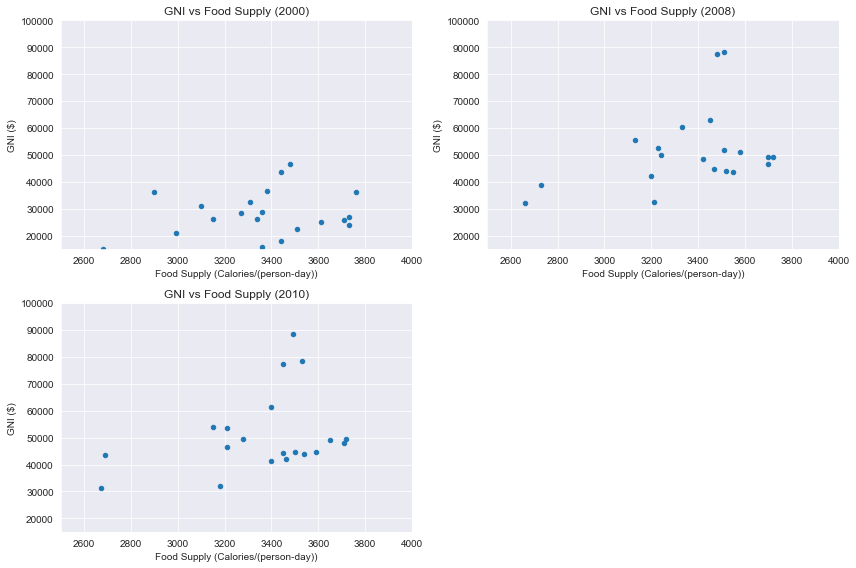

In [106]:
# Skipping Water Available and Sanitation Available, because they tend to be high in developed countries

fig = plt.figure(figsize=(12, 8))

ax43 = plt.subplot(2, 2, 1)
df_top15.plot.scatter(('Food Supply', '2000'), ('GNI', '2000'), ax=ax43)
plt.xlim((2500, 4000))
plt.ylim((15000, 100000))
plt.xlabel('Food Supply (Calories/(person-day))')
plt.ylabel('GNI ($)')
plt.title('GNI vs Food Supply (2000)')

ax44 = plt.subplot(2, 2, 2)
df_top15.plot.scatter(('Food Supply', '2008'), ('GNI', '2008'), ax=ax44)
plt.xlim((2500, 4000))
plt.ylim((15000, 100000))
plt.xlabel('Food Supply (Calories/(person-day))')
plt.ylabel('GNI ($)')
plt.title('GNI vs Food Supply (2008)')

ax45 = plt.subplot(2, 2, 3)
df_top15.plot.scatter(('Food Supply', '2010'), ('GNI', '2010'), ax=ax45)
plt.xlim((2500, 4000))
plt.ylim((15000, 100000))
plt.xlabel('Food Supply (Calories/(person-day))')
plt.ylabel('GNI ($)')
plt.title('GNI vs Food Supply (2010)')

plt.tight_layout()

**Observation:** For most of the Top 15 % countries, Food Supply ranged from 3,000 Calories per person to 3,800 Calories per person. 

In [107]:
bot_thres = df_economic['GNI']['2010'].quantile(0.15)
print('Bottom 15 percentile of GNI Threshold: {:.2f}'.format(bot_thres))

Bottom 15 percentile of GNI Threshold: 814.00


In [108]:
df_bot15 = df_economic[df_economic['GNI']['2010'] <= bot_thres]

In [109]:
df_bot15['country'] = df_bot15.index.copy()

C:\Users\MichaelWei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
# Show the Bottom 15 % of GNI earning countries
df_bot15

Inflation                          GNI                        \
                      2000   2008    2010   2016   2000   2008   2010    2016   
country                                                                         
Bangladesh           3.450   7.86   7.140   6.73  420.0  640.0  780.0  1330.0   
Benin                4.340   6.44   0.885  -0.28  390.0  750.0  790.0   820.0   
Burkina Faso        -0.820   7.64   6.810   4.02  250.0  520.0  570.0   610.0   
Burundi             38.900  24.00  12.300   3.80  130.0  190.0  210.0   280.0   
Cambodia            -4.280  12.30   3.120   3.46  300.0  670.0  750.0  1140.0   
Comoros             -4.460   5.27   3.870   6.94  420.0  730.0  790.0   770.0   
Congo, Dem. Rep.  2630.000  20.50  20.800   4.35  130.0  290.0  320.0   460.0   
Ethiopia             9.460  30.30   1.440  10.40  120.0  280.0  380.0   660.0   
Gambia               2.220   2.01   4.300   7.14  670.0  530.0  580.0   430.0   
Guinea               6.300  16.70  16.100   7.14  380.0  550.0  620.0   720.0   
Haiti               11.100  12.90   5.450  12.00  470.0  610.0  650.0   790.0   
Liberia             -6.890   7.35   5.470   4.97  150.0  180.0  250.0   370.0   
Madagascar           7.230   9.09   8.790   6.68  250.0  400.0  420.0   400.0   
Malawi              30.500  12.00  12.100  19.50  150.0  360.0  430.0   320.0   
Mali                -0.620   6.75   4.370   1.53  280.0  610.0  690.0   780.0   
Mozambique          10.900   7.98   7.640  12.30  280.0  440.0  460.0   480.0   
Nepal                4.470   5.62  15.100   5.07  230.0  440.0  540.0   730.0   
Niger                4.520   7.35   2.550   0.24  170.0  320.0  350.0   370.0   
Rwanda               2.780  14.30   2.610   5.50  240.0  450.0  560.0   710.0   
Sierra Leone         3.280   9.99  17.200   1.78  140.0  420.0  420.0   480.0   
Tanzania             7.570  15.90   9.250   6.16  300.0  580.0  690.0   900.0   
Togo                -4.290  14.60   1.180   2.13  290.0  390.0  450.0   600.0   
Uganda              11.100   6.36  10.600   3.53  270.0  420.0  540.0   630.0   
Zimbabwe             0.628   1.35   4.490   1.31  500.0  300.0  490.0   890.0   

                 Unemployment                      Region           country  
                         2000  2008  2010  2016                              
country                                                                      
Bangladesh               1.02   NaN  2.46  3.21      Asia        Bangladesh  
Benin                     NaN   NaN  0.85   NaN    Africa             Benin  
Burkina Faso              NaN   NaN   NaN   NaN    Africa      Burkina Faso  
Burundi                   NaN   NaN   NaN   NaN    Africa           Burundi  
Cambodia                  NaN  1.08  0.30   NaN      Asia          Cambodia  
Comoros                   NaN   NaN   NaN   NaN    Africa           Comoros  
Congo, Dem. Rep.          NaN   NaN   NaN   NaN    Africa  Congo, Dem. Rep.  
Ethiopia                  NaN   NaN   NaN   NaN    Africa          Ethiopia  
Gambia                    NaN   NaN   NaN   NaN    Africa            Gambia  
Guinea                    NaN   NaN   NaN   NaN    Africa            Guinea  
Haiti                     NaN   NaN   NaN   NaN  Americas             Haiti  
Liberia                   NaN   NaN  2.22   NaN    Africa           Liberia  
Madagascar                NaN   NaN   NaN   NaN    Africa        Madagascar  
Malawi                    NaN   NaN   NaN   NaN    Africa            Malawi  
Mali                      NaN   NaN  7.74  3.04    Africa              Mali  
Mozambique                NaN   NaN   NaN   NaN    Africa        Mozambique  
Nepal                     NaN  1.19   NaN   NaN      Asia             Nepal  
Niger                     NaN   NaN   NaN   NaN    Africa             Niger  
Rwanda                    NaN   NaN   NaN   NaN    Africa            Rwanda  
Sierra Leone              NaN   NaN   NaN   NaN    Africa      Sierra Leone  
Tanzania                  NaN   NaN

In [111]:
df_bot15 = df_bot15.merge(df_nrg, how='left', left_index=True, right_index=True)

In [112]:
df_bot15 = df_bot15.merge(df_edu, how='left', left_index=True, right_index=True)

In [113]:
df_bot15 = df_bot15.merge(df_health, how='left', left_index=True, right_index=True)

In [114]:
# Check that the merges worked

df_bot15

Inflation                          GNI                        \
                      2000   2008    2010   2016   2000   2008   2010    2016   
country                                                                         
Bangladesh           3.450   7.86   7.140   6.73  420.0  640.0  780.0  1330.0   
Benin                4.340   6.44   0.885  -0.28  390.0  750.0  790.0   820.0   
Burkina Faso        -0.820   7.64   6.810   4.02  250.0  520.0  570.0   610.0   
Burundi             38.900  24.00  12.300   3.80  130.0  190.0  210.0   280.0   
Cambodia            -4.280  12.30   3.120   3.46  300.0  670.0  750.0  1140.0   
Comoros             -4.460   5.27   3.870   6.94  420.0  730.0  790.0   770.0   
Congo, Dem. Rep.  2630.000  20.50  20.800   4.35  130.0  290.0  320.0   460.0   
Ethiopia             9.460  30.30   1.440  10.40  120.0  280.0  380.0   660.0   
Gambia               2.220   2.01   4.300   7.14  670.0  530.0  580.0   430.0   
Guinea               6.300  16.70  16.100   7.14  380.0  550.0  620.0   720.0   
Haiti               11.100  12.90   5.450  12.00  470.0  610.0  650.0   790.0   
Liberia             -6.890   7.35   5.470   4.97  150.0  180.0  250.0   370.0   
Madagascar           7.230   9.09   8.790   6.68  250.0  400.0  420.0   400.0   
Malawi              30.500  12.00  12.100  19.50  150.0  360.0  430.0   320.0   
Mali                -0.620   6.75   4.370   1.53  280.0  610.0  690.0   780.0   
Mozambique          10.900   7.98   7.640  12.30  280.0  440.0  460.0   480.0   
Nepal                4.470   5.62  15.100   5.07  230.0  440.0  540.0   730.0   
Niger                4.520   7.35   2.550   0.24  170.0  320.0  350.0   370.0   
Rwanda               2.780  14.30   2.610   5.50  240.0  450.0  560.0   710.0   
Sierra Leone         3.280   9.99  17.200   1.78  140.0  420.0  420.0   480.0   
Tanzania             7.570  15.90   9.250   6.16  300.0  580.0  690.0   900.0   
Togo                -4.290  14.60   1.180   2.13  290.0  390.0  450.0   600.0   
Uganda              11.100   6.36  10.600   3.53  270.0  420.0  540.0   630.0   
Zimbabwe             0.628   1.35   4.490   1.31  500.0  300.0  490.0   890.0   

                 Unemployment       ...  Sanitation Available Food Supply  \
                         2000  2008 ...                  2010        2000   
country                             ...                                     
Bangladesh               1.02   NaN ...                   NaN         NaN   
Benin                     NaN   NaN ...                   NaN         NaN   
Burkina Faso              NaN   NaN ...                   NaN         NaN   
Burundi                   NaN   NaN ...                   NaN         NaN   
Cambodia                  NaN  1.08 ...                   NaN         NaN   
Comoros                   NaN   NaN ...                   NaN         NaN   
Congo, Dem. Rep.          NaN   NaN ...                   NaN         NaN   
Ethiopia                  NaN   NaN ...                   NaN         NaN   
Gambia                    NaN   NaN ...                   NaN         NaN   
Guinea                    NaN   NaN ...                   NaN         NaN   
Haiti                     NaN   NaN ...                   NaN         NaN   
Liberia                   NaN   NaN ...                   NaN         NaN   
Madagascar                NaN   NaN ...                   NaN         NaN   
Malawi                    NaN   NaN ...                   NaN         NaN   
Mali                      NaN   NaN ...                   NaN         NaN   
Mozambique                NaN   NaN ...                   NaN         NaN   
Nepal                     NaN  1.19 ...                   NaN         NaN   
Niger                     NaN   NaN ...                   NaN         NaN   
Rwanda                    NaN   NaN ...                   NaN         NaN   
Sierra Leone              NaN   NaN ...                   NaN         NaN   
Tanzania                  NaN   NaN ...                   

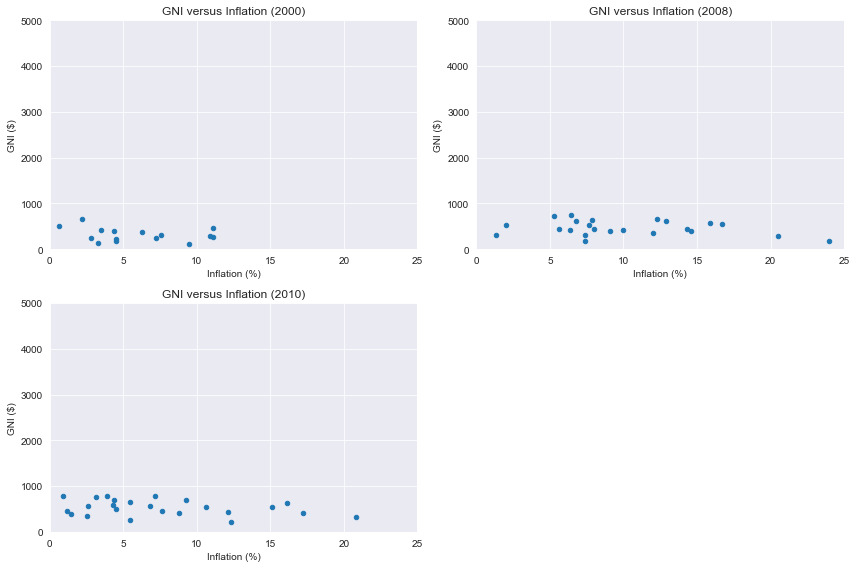

In [115]:
fig=plt.figure(figsize=(12, 8))
ax46 = plt.subplot(2, 2, 1)
df_bot15.plot.scatter(('Inflation', '2000'), ('GNI', '2000'), ax=ax46)
plt.xlim((0, 25))
plt.ylim((0, 5000))
plt.xlabel('Inflation (%)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2000)')

ax47 = plt.subplot(2, 2, 2)
df_bot15.plot.scatter(('Inflation', '2008'), ('GNI', '2008'), ax=ax47)
plt.xlim((0, 25))
plt.ylim((0, 5000))
plt.xlabel('Inflation (%)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2008)')

ax48 = plt.subplot(2, 2, 3)
df_bot15.plot.scatter(('Inflation', '2010'), ('GNI', '2010'), ax=ax48)
plt.xlim((0, 25))
plt.ylim((0, 5000))
plt.xlabel('Inflation (%)')
plt.ylabel('GNI ($)')
plt.title('GNI versus Inflation (2010)')

plt.tight_layout();

**Observation:** From 2000 to 2010, the Bottom 15 % countries show a consistent spread of inflation from 0 to 21 %. Additionally, GNI appears to be under $1,000 for each of these countries.

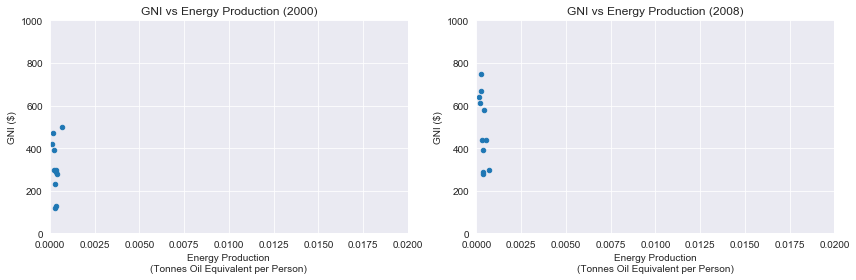

In [116]:
fig = plt.figure(figsize=(12, 4))

ax49 = plt.subplot(1, 2, 1)
df_bot15.plot.scatter(('NRG Produced', '2000'), ('GNI', '2000'), ax=ax49)
plt.xlim((0, 0.02))
plt.ylim((0, 1000))
plt.xlabel('Energy Production\n(Tonnes Oil Equivalent per Person)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Production (2000)')

ax50 = plt.subplot(1, 2, 2)
df_bot15.plot.scatter(('NRG Produced', '2008'), ('GNI', '2008'), ax=ax50)
plt.xlim((0, 0.02))
plt.ylim((0, 1000))
plt.xlabel('Energy Production\n(Tonnes Oil Equivalent per Person)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Production (2008)')

plt.tight_layout();

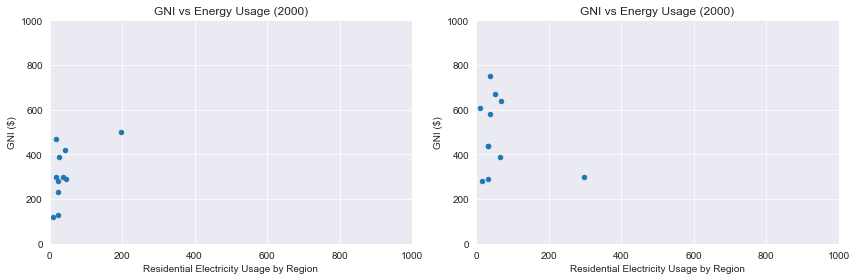

In [117]:
fig = plt.figure(figsize=(12, 4))

ax51 = plt.subplot(1, 2, 1)
df_bot15.plot.scatter(('NRG Used', '2000'), ('GNI', '2000'), ax=ax51)
plt.xlim((0, 1000))
plt.ylim((0, 1000))
plt.xlabel('Residential Electricity Usage by Region')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Usage (2000)')

ax52 = plt.subplot(1, 2, 2)
df_bot15.plot.scatter(('NRG Used', '2008'), ('GNI', '2008'), ax=ax52)
plt.xlim((0, 1000))
plt.ylim((0, 1000))
plt.xlabel('Residential Electricity Usage by Region')
plt.ylabel('GNI ($)')
plt.title('GNI vs Energy Usage (2000)')

plt.tight_layout();

**Observation:** Most of the Bottom 15 % countries show low levels of energy production and energy usage.

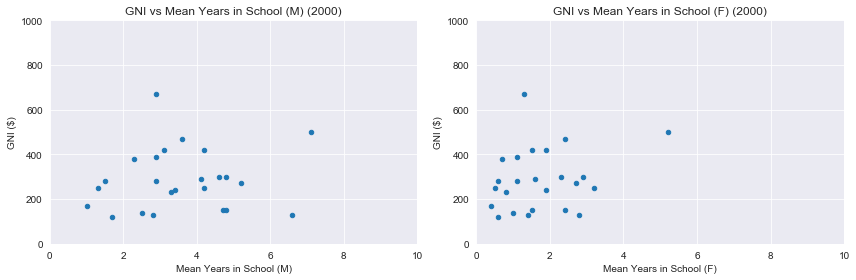

In [118]:
fig = plt.figure(figsize=(12, 4))

ax53 = plt.subplot(1, 2, 1)
df_bot15.plot.scatter(('Mean Years School (M)', '2000'), ('GNI', '2000'), ax=ax53)
plt.xlim((0, 10))
plt.ylim((0, 1000))
plt.xlabel('Mean Years in School (M)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (M) (2000)')

ax54 = plt.subplot(1, 2, 2)
df_bot15.plot.scatter(('Mean Years School (F)', '2000'), ('GNI', '2000'), ax=ax54)
plt.xlim((0, 10))
plt.ylim((0, 1000))
plt.xlabel('Mean Years in School (F)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (F) (2000)')

plt.tight_layout()

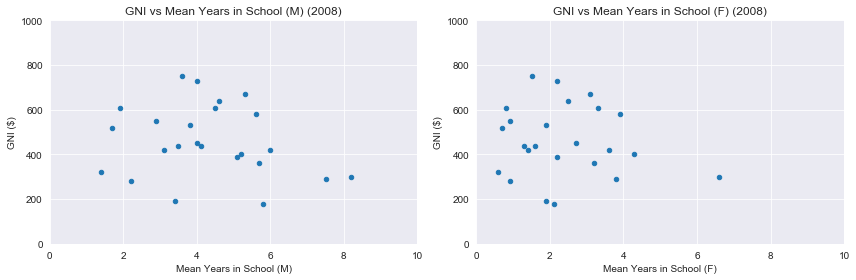

In [119]:
fig = plt.figure(figsize=(12, 4))

ax55 = plt.subplot(1, 2, 1)
df_bot15.plot.scatter(('Mean Years School (M)', '2008'), ('GNI', '2008'), ax=ax55)
plt.xlim((0, 10))
plt.ylim((0, 1000))
plt.xlabel('Mean Years in School (M)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (M) (2008)')

ax56 = plt.subplot(1, 2, 2)
df_bot15.plot.scatter(('Mean Years School (F)', '2008'), ('GNI', '2008'), ax=ax56)
plt.xlim((0, 10))
plt.ylim((0, 1000))
plt.xlabel('Mean Years in School (F)')
plt.ylabel('GNI ($)')
plt.title('GNI vs Mean Years in School (F) (2008)')

plt.tight_layout()

**Observation:** For both years, the show a difference between years of education between males and females, as represented by where the data clustered. For males, the Mean Years of School is between 1 and 6 years, compared to a Mean Years in School for females of 0 to 4 years. 

<a id='conclusions'></a>
## Conclusions

### Research Question 1 Insights (General Global Statistical Data)

* Global Average Life Expectancy has generally increased, from a range of 45 - 80 years in 2000 to a range of approximately 57 - 84.

* While we know that global population has increased from 2000 to 2016, we can see that the largest population density increase can be attributed to the Asia region. 

* Europe appears to hold most of the Global Gross National Income. 

* Adjusting for only countries that do not show hyperinflation, most world regions have obtained between 1 % and 5 % inflation for 2016. 

### Research Question 2 Insights (Factors Contributing to GNI)

* GNI is likely linked to Inflation, based on how the data are scattered in the time periods between 2000 and 2016. 

* Water Availability and Basic Sanitation has increased in all regions from 2000 to 2010. 

* Although most indicators have increased from 2000 to 2010 in a positive direction (i.e. increased Residential Electricity Usage, Mean Years of School (Both Males and Females), Water Availability, Sanitation Available, Food Supply), they do not appear to have meaningful correlations with GNI. 

### Research Question 3 Insights (Top 15 % GNI Countries and Bottom 15 % GNI Countries)

The Top 15 % of GNI countries showed the following attributes:
* All GNIs above $15,000, with most inflation rates below 5 %
* No movement towards increased Energy Production or Energy Usage between 2000 and 2008
* Mean Year in School appear to be scattered similarly between Males and Females (i.e. they go to school at the same number of years). This trend continues through 2008. 
* Food Supply ranges from 2,600 to 3800 Calories/(person-day)

The Bottom 15 % of GNI countries showed the following attributes:
* All GNIs less than $1,000, with a spread of inflation with a range of 0 - 25 %
* No movement towards increased Energy Production or Energy Usage between 2000 and 2008. 
* Noticeable difference between Mean Years in School for Males and Females. For Females, the Mean Years in School fall within a range of 0 to 4 years, 	versus 1 to 6 for males. This trend continues in 2008. 
* No Food Supply data are available for this subset of countries

### Limitations

* Although most of the missing data were for countries with smaller populations, a few countries were removed, which showed high GNI in at least one of the years examined (e.g. Qatar, Monaco, United Arab Emirates). 
* While statistical analysis by region is a starting point, analysis on each indicator could be extended by looking at countries within each region to tease out why certain regions show certain characteristics. This is demonstrated by the Average Inflation by Region analysis, when we learned that Belarus, Angola, Democratic Republic of Congo, and Nigeria exhibited hyperinflation in 2000. 
* Since the data are filtered, it is likely that several known major energy producing countries were removed for the Total Energy Production and Usage by Region analysis.
* No Food Supply data are available for the Bottom 15 % of GNI earning countries.